## Encoding dataset : Movie Metadata

In [1]:
import pandas as pd
import numpy as np
#Encoding modules
import ast
import sys
sys.path.append('../modules')
from encoding_module import json_to_DF
from encoding_module import onehot_json
#Plots
from plot_module import barPlot
from plot_module import featureAnalysis
#API
import requests
import concurrent.futures
#NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#Ignore Warning
import warnings
warnings.filterwarnings("ignore")

### Outline

- [Loading datset](#1)
- [Drop Features](#2)
- [Cleaning Dataset](#3)
    - [Video](#3.0)
    - [Status](#3.1)
    - [Adults](#3.2)
    - [Collections](#3.3)
    - [Genres](#3.4)
    - [Original_language](#3.5)
    - [Production_companies](#3.6)
    - [production_countries](#3.7)
    - [Spoken_languages](#3.8)
 
- [Preprocessing](#4)







# 

<a name="1"></a>
## Loading datasets

In [2]:
movies_metadata = pd.read_csv('../../dataset/movies_metadata_raw.csv')

In [3]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [4]:
#Check Columns
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
#Drop Duplicated Values
movies_metadata=movies_metadata.drop_duplicates()
movies_metadata.shape

(45453, 24)

In [6]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45453 non-null  object 
 3   genres                 45453 non-null  object 
 4   homepage               7780 non-null   object 
 5   id                     45453 non-null  object 
 6   imdb_id                45436 non-null  object 
 7   original_language      45442 non-null  object 
 8   original_title         45453 non-null  object 
 9   overview               44499 non-null  object 
 10  popularity             45448 non-null  object 
 11  poster_path            45067 non-null  object 
 12  production_companies   45450 non-null  object 
 13  production_countries   45450 non-null  object 
 14  release_date           45366 non-null  object 
 15  re

# 

<a name="2"></a>
## Drop useless features

**Links**

In [7]:
selected_features = ['homepage', 'poster_path']
movies_metadataLinks = movies_metadata[selected_features]
movies_metadataLinks

,homepage,poster_path
0,http://toystory.disney.com/toy-story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,NaN,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,NaN,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,NaN,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,NaN,/e64sOI48hQXyru7naBFyssKFxVd.jpg
...,...,...
45461,http://www.imdb.com/title/tt6209470/,/jldsYflnId4tTWPx8es3uzsB1I8.jpg
45462,NaN,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
45463,NaN,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
45464,NaN,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg


In [8]:
#This feature is useless and has lots of null values
movies_metadata.drop(['homepage'],inplace=True,axis =1)

In [9]:
movies_metadata['poster_path'].head(5)

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3    /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4    /e64sOI48hQXyru7naBFyssKFxVd.jpg
Name: poster_path, dtype: object

In [10]:
#This feature is also useless 
movies_metadata.drop(['poster_path'],inplace=True,axis =1)

**text features**

In [11]:
selected_features = ['id', 'imdb_id', 'title' ,'original_title', 'overview','tagline']
textBased = movies_metadata[selected_features]
textBased

,id,imdb_id,title,original_title,overview,tagline
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...
...,...,...,...,...,...,...
45461,439050,tt6209470,Subdue,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman
45462,111109,tt2028550,Century of Birthing,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN
45463,67758,tt0303758,Betrayal,Betrayal,"When one of her hits goes wrong, a professiona...",A deadly game of wits.
45464,227506,tt0008536,Satan Triumphant,Satana likuyushchiy,"In a small town live two brothers, one a minis...",NaN


In [12]:
movies_metadata.drop(['original_title'], inplace = True , axis=1)
movies_metadata.drop(['title'], inplace = True , axis=1)
movies_metadata.drop(['overview'], inplace = True , axis=1)
movies_metadata.drop(['tagline'], inplace = True , axis=1)
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,3.8,6.0
45464,False,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,False,0.0,0.0


In [13]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45453 non-null  object 
 3   genres                 45453 non-null  object 
 4   id                     45453 non-null  object 
 5   imdb_id                45436 non-null  object 
 6   original_language      45442 non-null  object 
 7   popularity             45448 non-null  object 
 8   production_companies   45450 non-null  object 
 9   production_countries   45450 non-null  object 
 10  release_date           45366 non-null  object 
 11  revenue                45447 non-null  float64
 12  runtime                45190 non-null  float64
 13  spoken_languages       45447 non-null  object 
 14  status                 45366 non-null  object 
 15  vi

# 

<a name="3"></a>
## Clean and encode other features

In [14]:
movies_metadataOrginal = movies_metadata.copy()

In [15]:
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,3.8,6.0
45464,False,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,False,0.0,0.0


In [16]:
features = movies_metadata.columns

In [17]:
unique_counts = {}

for feature in features:
    unique_count = movies_metadata[feature].nunique()
    unique_counts[feature] = unique_count

sorted_counts = sorted(unique_counts.items(), key=lambda x: x[1], reverse=False)

for feature, count in sorted_counts:
    print(f"Number of unique values for {feature}: {count}")

Number of unique values for video: 2
Number of unique values for adult: 5
Number of unique values for status: 6
Number of unique values for original_language: 92
Number of unique values for vote_average: 92
Number of unique values for runtime: 353
Number of unique values for budget: 1226
Number of unique values for belongs_to_collection: 1698
Number of unique values for vote_count: 1820
Number of unique values for spoken_languages: 1931
Number of unique values for production_countries: 2393
Number of unique values for genres: 4069
Number of unique values for revenue: 6863
Number of unique values for release_date: 17336
Number of unique values for production_companies: 22708
Number of unique values for popularity: 44176
Number of unique values for imdb_id: 45417
Number of unique values for id: 45436


# 

<a name="3.0"></a>
**Video**

In [18]:
movies_metadata['video'].unique()

array([False, True, nan], dtype=object)

In [19]:
movies_metadata['video'].isnull().sum()

6

In [20]:
movies_metadata.dropna(subset=['video'], inplace=True)

In [21]:
encoded_df = pd.get_dummies(movies_metadata['video'], prefix='video')
movies_metadata = pd.concat([movies_metadata, encoded_df], axis=1)
movies_metadata.drop('video', axis=1, inplace=True)

In [22]:
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,video_False,video_True
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,7.7,5415.0,1,0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,6.9,2413.0,1,0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.5,92.0,1,0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.1,34.0,1,0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,5.7,173.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,4.0,1.0,1,0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,9.0,3.0,1,0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,3.8,6.0,1,0
45464,False,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,0.0,0.0,1,0


# 

<a name="3.1"></a>
**Status**

In [23]:
movies_metadata['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [24]:
movies_metadata['status'].isnull().sum()

81

In [25]:
movies_metadata.dropna(subset=['status'], inplace=True)

In [26]:
encoded_df = pd.get_dummies(movies_metadata['status'], prefix='video')
movies_metadata = pd.concat([movies_metadata, encoded_df], axis=1)
movies_metadata.drop('status', axis=1, inplace=True)

In [27]:
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,vote_average,vote_count,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,7.7,5415.0,1,0,0,0,0,0,1,0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.9,2413.0,1,0,0,0,0,0,1,0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.5,92.0,1,0,0,0,0,0,1,0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.1,34.0,1,0,0,0,0,0,1,0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,5.7,173.0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",...,4.0,1.0,1,0,0,0,0,0,1,0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",...,9.0,3.0,1,0,0,0,0,0,1,0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,3.8,6.0,1,0,0,0,0,0,1,0
45464,False,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",...,0.0,0.0,1,0,0,0,0,0,1,0


# 

<a name="3.2"></a>
**Adult**

In [28]:
movies_metadata['adult'].unique()

array(['False', 'True'], dtype=object)

In [29]:
filtered_df = movies_metadata[~((movies_metadata['adult'] == 'True') | (movies_metadata['adult'] == 'False'))]
filtered_df

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,vote_average,vote_count,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored


In [30]:
movies_metadata =  movies_metadata[(movies_metadata['adult'] == 'True') | (movies_metadata['adult'] == 'False')]

In [31]:
movies_metadata['adult'].unique()

array(['False', 'True'], dtype=object)

In [32]:
encoded_df = pd.get_dummies(movies_metadata['adult'], prefix='adult')
movies_metadata = pd.concat([movies_metadata, encoded_df], axis=1)
movies_metadata.drop('adult', axis=1, inplace=True)

In [33]:
movies_metadata

,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,...,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored,adult_False,adult_True
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,1,0,0,0,0,0,1,0,1,0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,1,0,0,0,0,0,1,0,1,0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,...,1,0,0,0,0,0,1,0,1,0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,...,1,0,0,0,0,0,1,0,1,0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,...,1,0,0,0,0,0,1,0,1,0
45464,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,...,1,0,0,0,0,0,1,0,1,0


# 

<a name="3.3"></a>
**Collections**

In [34]:
belongToCollection = movies_metadata[movies_metadata['belongs_to_collection'].isnull() == False]

In [35]:
listValues = belongToCollection['belongs_to_collection'].tolist()

In [36]:
len(listValues)

4488

In [37]:
#Single movies
movies_metadata['belongs_to_collection'].fillna('0', inplace=True)

In [38]:
belongToCollection

,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,...,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored,adult_False,adult_True
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,1,0,0,0,0,0,1,0,1,0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,1,0,0,0,0,0,1,0,1,0
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,...,1,0,0,0,0,0,1,0,1,0
12,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,tt0112453,en,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",24568,tt0061680,en,1.114848,"[{'name': 'The Rank Organisation', 'id': 364},...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1967-09-01,...,1,0,0,0,0,0,1,0,1,0
45358,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",19307,tt0064133,en,4.103723,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1969-05-29,...,1,0,0,0,0,0,1,0,1,0
45369,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",21251,tt0074286,en,0.846154,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1976-10-01,...,1,0,0,0,0,0,1,0,1,0
45371,"{'id': 477208, 'name': 'DC Super Hero Girls Co...",0,"[{'id': 16, 'name': 'Animation'}]",460135,tt7158814,en,8.413734,"[{'name': 'Warner Bros. Animation', 'id': 2785}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-08-30,...,1,0,0,0,0,0,1,0,1,0


In [39]:
movies_metadata['belongs_to_collection'] = movies_metadata['belongs_to_collection'].apply(lambda x: '[' + x + ']')

In [40]:
movies_metadata.loc[0]['belongs_to_collection']

"[{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}]"

In [41]:
movies_metadata['Single'] = movies_metadata['belongs_to_collection'].apply(lambda x: 1 if '[0]' in x else 0)

In [42]:
movies_metadata.drop(['belongs_to_collection'], inplace = True , axis=1)

In [43]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored,adult_False,adult_True,Single
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,1,0,1,0,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,1,0,1,0,1
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,1,0,1,0,0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,1,0,1,0,1
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,1,0,1,0,1
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,1,0,1,0,1
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,...,0,0,0,0,0,1,0,1,0,1
45464,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,...,0,0,0,0,0,1,0,1,0,1


In [44]:
movies_metadata.columns.tolist()

['budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single']

# 

<a name="3.4"></a>
**Genres**

In [45]:
genres = movies_metadata.copy()

In [46]:
genres_df = json_to_DF(genres , 'genres' )
genres_df

,name,frequency
0,Drama,20235
1,Comedy,13169
2,Thriller,7616
3,Romance,6726
4,Action,6585
5,Horror,4668
6,Crime,4304
7,Documentary,3916
8,Adventure,3492
9,Science Fiction,3040


In [47]:
feature_list = movies_metadata['genres'].tolist()

In [48]:
movies_metadata = onehot_json(movies_metadata,'genres','name')

In [49]:
movies_metadata = movies_metadata.dropna(subset=['History'])
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,"[{'id': 878, 'name': 'Science Fiction'}]",222848,tt0112613,en,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
movies_metadata.columns.tolist()

['budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single',
 'name_col',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [51]:
movies_metadata.drop(['name_col'],inplace=True,axis =1)

# 

<a name="3.5"></a>
**Original_language**

In [52]:
movies_metadata['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'cy', 'vi',
       'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo', 'ca',
       'fi', 'th', 'sk', 'hu', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [53]:
movies_metadata['original_language'].isnull().sum()

10

In [54]:
movies_metadata.dropna(subset=['original_language'], inplace=True)

en: Frequency = 30527, Percentage = 71.09%
fr: Frequency = 2349, Percentage = 5.47%
it: Frequency = 1359, Percentage = 3.16%
ja: Frequency = 1289, Percentage = 3.00%
de: Frequency = 1029, Percentage = 2.40%
es: Frequency = 926, Percentage = 2.16%
ru: Frequency = 785, Percentage = 1.83%
hi: Frequency = 478, Percentage = 1.11%
ko: Frequency = 431, Percentage = 1.00%
zh: Frequency = 391, Percentage = 0.91%
sv: Frequency = 370, Percentage = 0.86%
cn: Frequency = 310, Percentage = 0.72%
pt: Frequency = 303, Percentage = 0.71%
fi: Frequency = 240, Percentage = 0.56%
nl: Frequency = 229, Percentage = 0.53%
da: Frequency = 217, Percentage = 0.51%
pl: Frequency = 207, Percentage = 0.48%
cs: Frequency = 126, Percentage = 0.29%
tr: Frequency = 118, Percentage = 0.27%
el: Frequency = 103, Percentage = 0.24%
no: Frequency = 101, Percentage = 0.24%
fa: Frequency = 95, Percentage = 0.22%
hu: Frequency = 90, Percentage = 0.21%
ta: Frequency = 78, Percentage = 0.18%
th: Frequency = 73, Percentage = 0.1

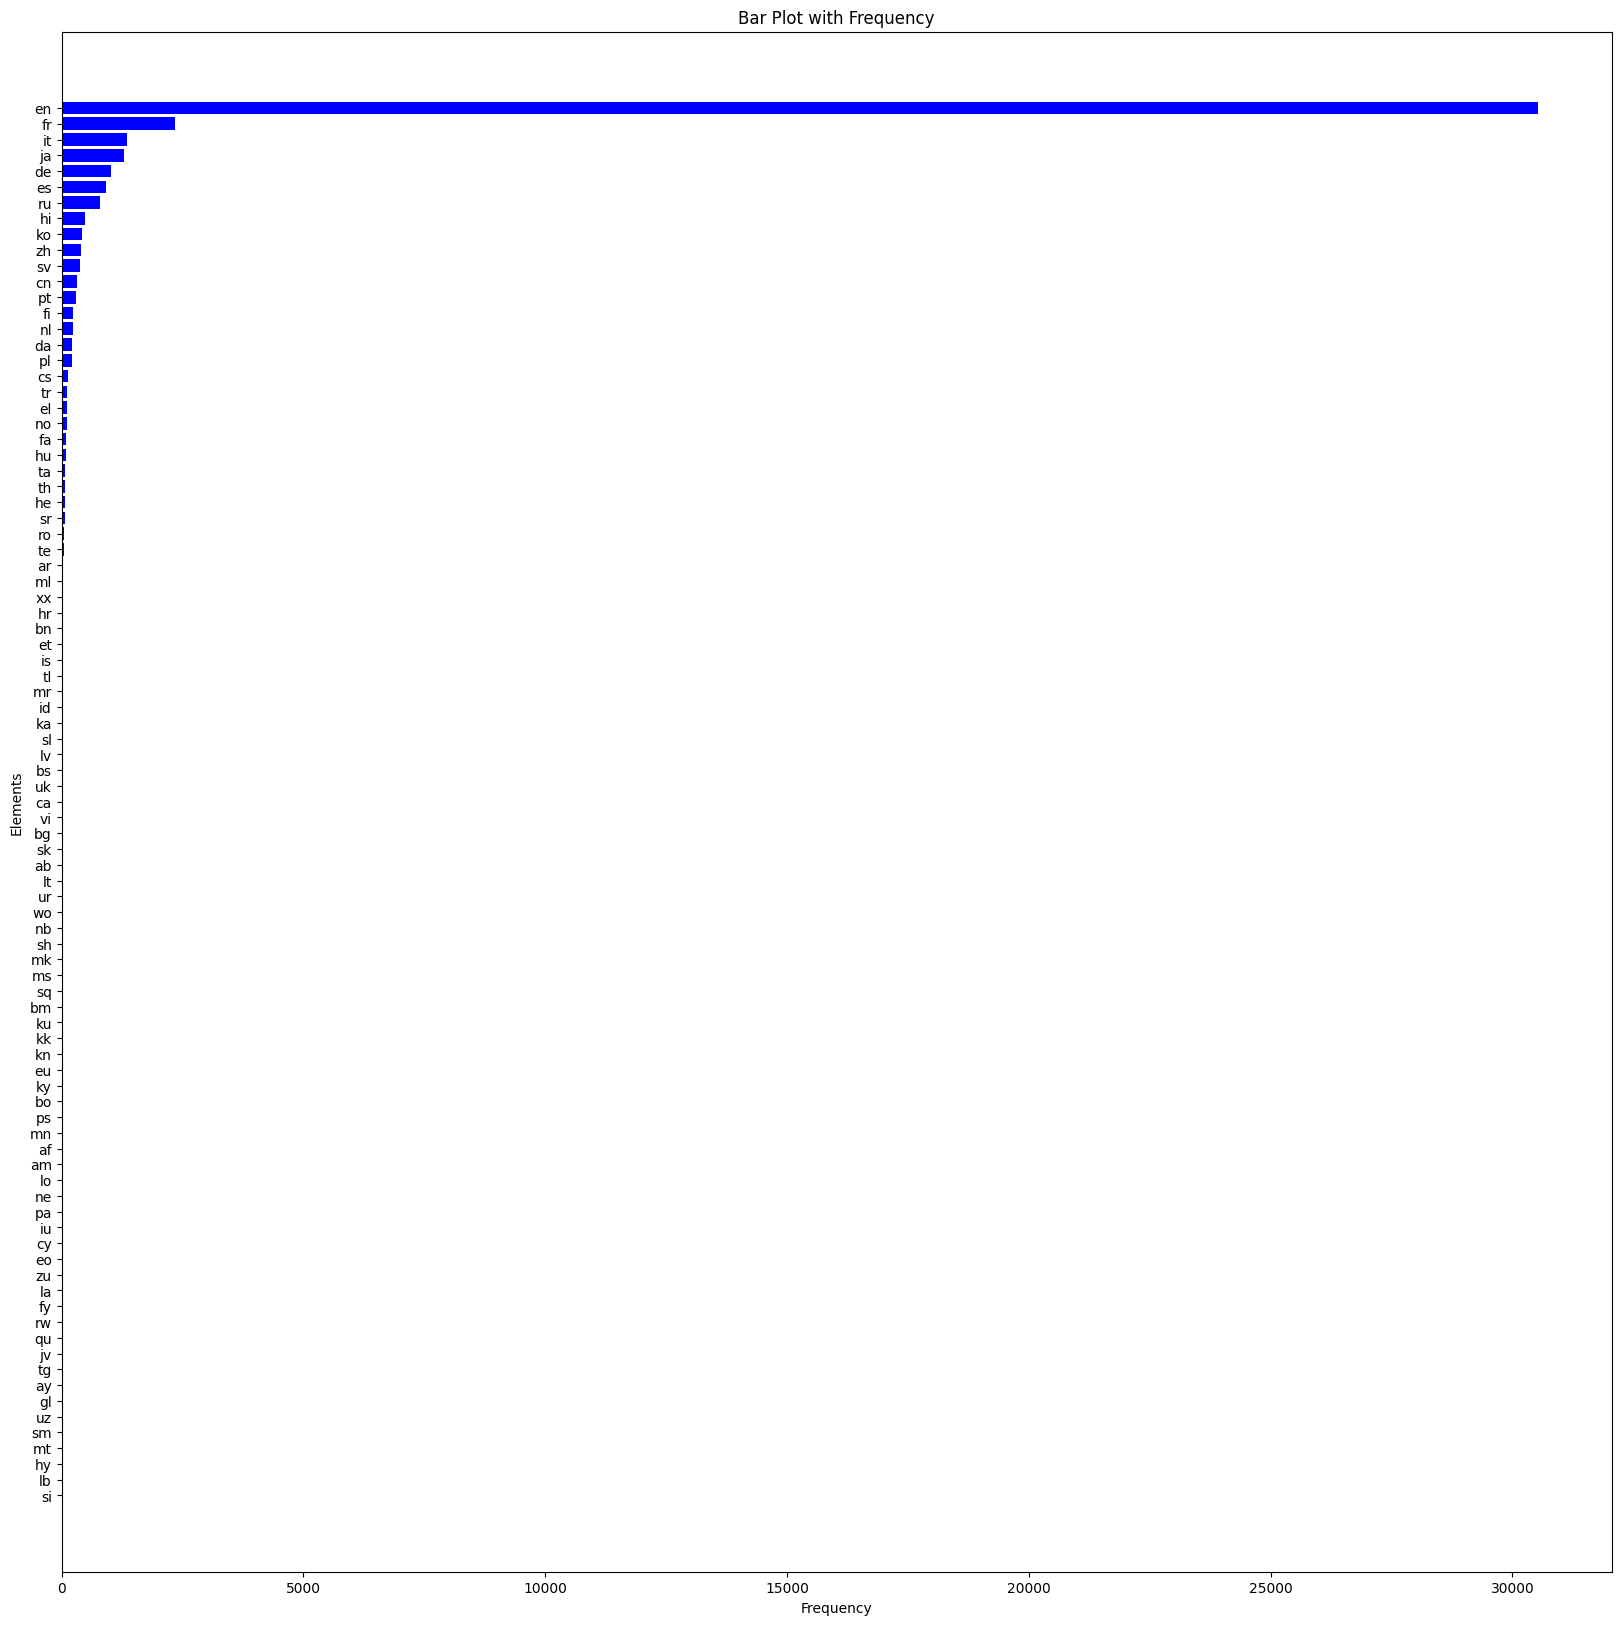

In [55]:
sorted_frq = barPlot(movies_metadata,'original_language','blue',20,40)

In [56]:
allowed_values = sorted_frq[:30]

In [57]:
movies_metadata.loc[~movies_metadata['original_language'].isin(allowed_values), 'original_language'] = 'others'

In [58]:
df_encoded = pd.get_dummies(movies_metadata['original_language'], prefix='original_language')
movies_metadata = pd.concat([movies_metadata, df_encoded], axis=1)
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,0,0,0,0,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,"[{'id': 878, 'name': 'Science Fiction'}]",222848,tt0112613,en,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,...,0,0,0,0,0,0,0,0,0,0
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0,0,0,0,0,0,0,0,0,0
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,others,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
movies_metadata.columns

Index(['budget', 'genres', 'id', 'imdb_id', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count',
       'video_False', 'video_True', 'video_Canceled', 'video_In Production',
       'video_Planned', 'video_Post Production', 'video_Released',
       'video_Rumored', 'adult_False', 'adult_True', 'Single', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'original_language_ar', 'original_language_cn', 'original_language_cs',
       'original_language_da', 'original_language_de', 'original_language_el',
       'original_language_en', 'original_language_es', 'original_language_fa',
       'original_language_fi', 'original_language_fr', 'original_language_he',
   

# 

<a name="3.6"></a>
**Production_companies**

In [60]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,0,0,0,0,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,"[{'id': 878, 'name': 'Science Fiction'}]",222848,tt0112613,en,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,...,0,0,0,0,0,0,0,0,0,0
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0,0,0,0,0,0,0,0,0,0
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,others,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
movies_metadata = movies_metadata[movies_metadata['production_countries'] != '[]'] 

In [62]:
feature_list = movies_metadata['production_companies'].tolist()

In [63]:
movies_metadata['production_companies'].isnull().sum()

0

In [64]:
movies_metadata['production_companies']

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45459      [{'name': 'Concorde-New Horizons', 'id': 4688}]
45460    [{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
Name: production_companies, Length: 38289, dtype: object

In [65]:
production_companies = movies_metadata.copy()

In [66]:
df = json_to_DF(production_companies , 'production_companies' )

In [67]:
df

,name,frequency
0,Warner Bros.,1242
1,Metro-Goldwyn-Mayer (MGM),1059
2,Paramount Pictures,995
3,Universal Pictures,823
4,Twentieth Century Fox Film Corporation,822
...,...,...
23196,Concordia Compagnia Cinematografica,1
23197,Amicus Entertainment,1
23198,Alcina,1
23199,Kino Finland,1


In [68]:
df['frequency'].describe()

count    23201.000000
mean         2.988233
std         17.170805
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1242.000000
Name: frequency, dtype: float64

,count,mean,std,min,25%,50%,75%,max
frequency,23201.0,2.988233,17.170805,1.0,1.0,1.0,2.0,1242.0


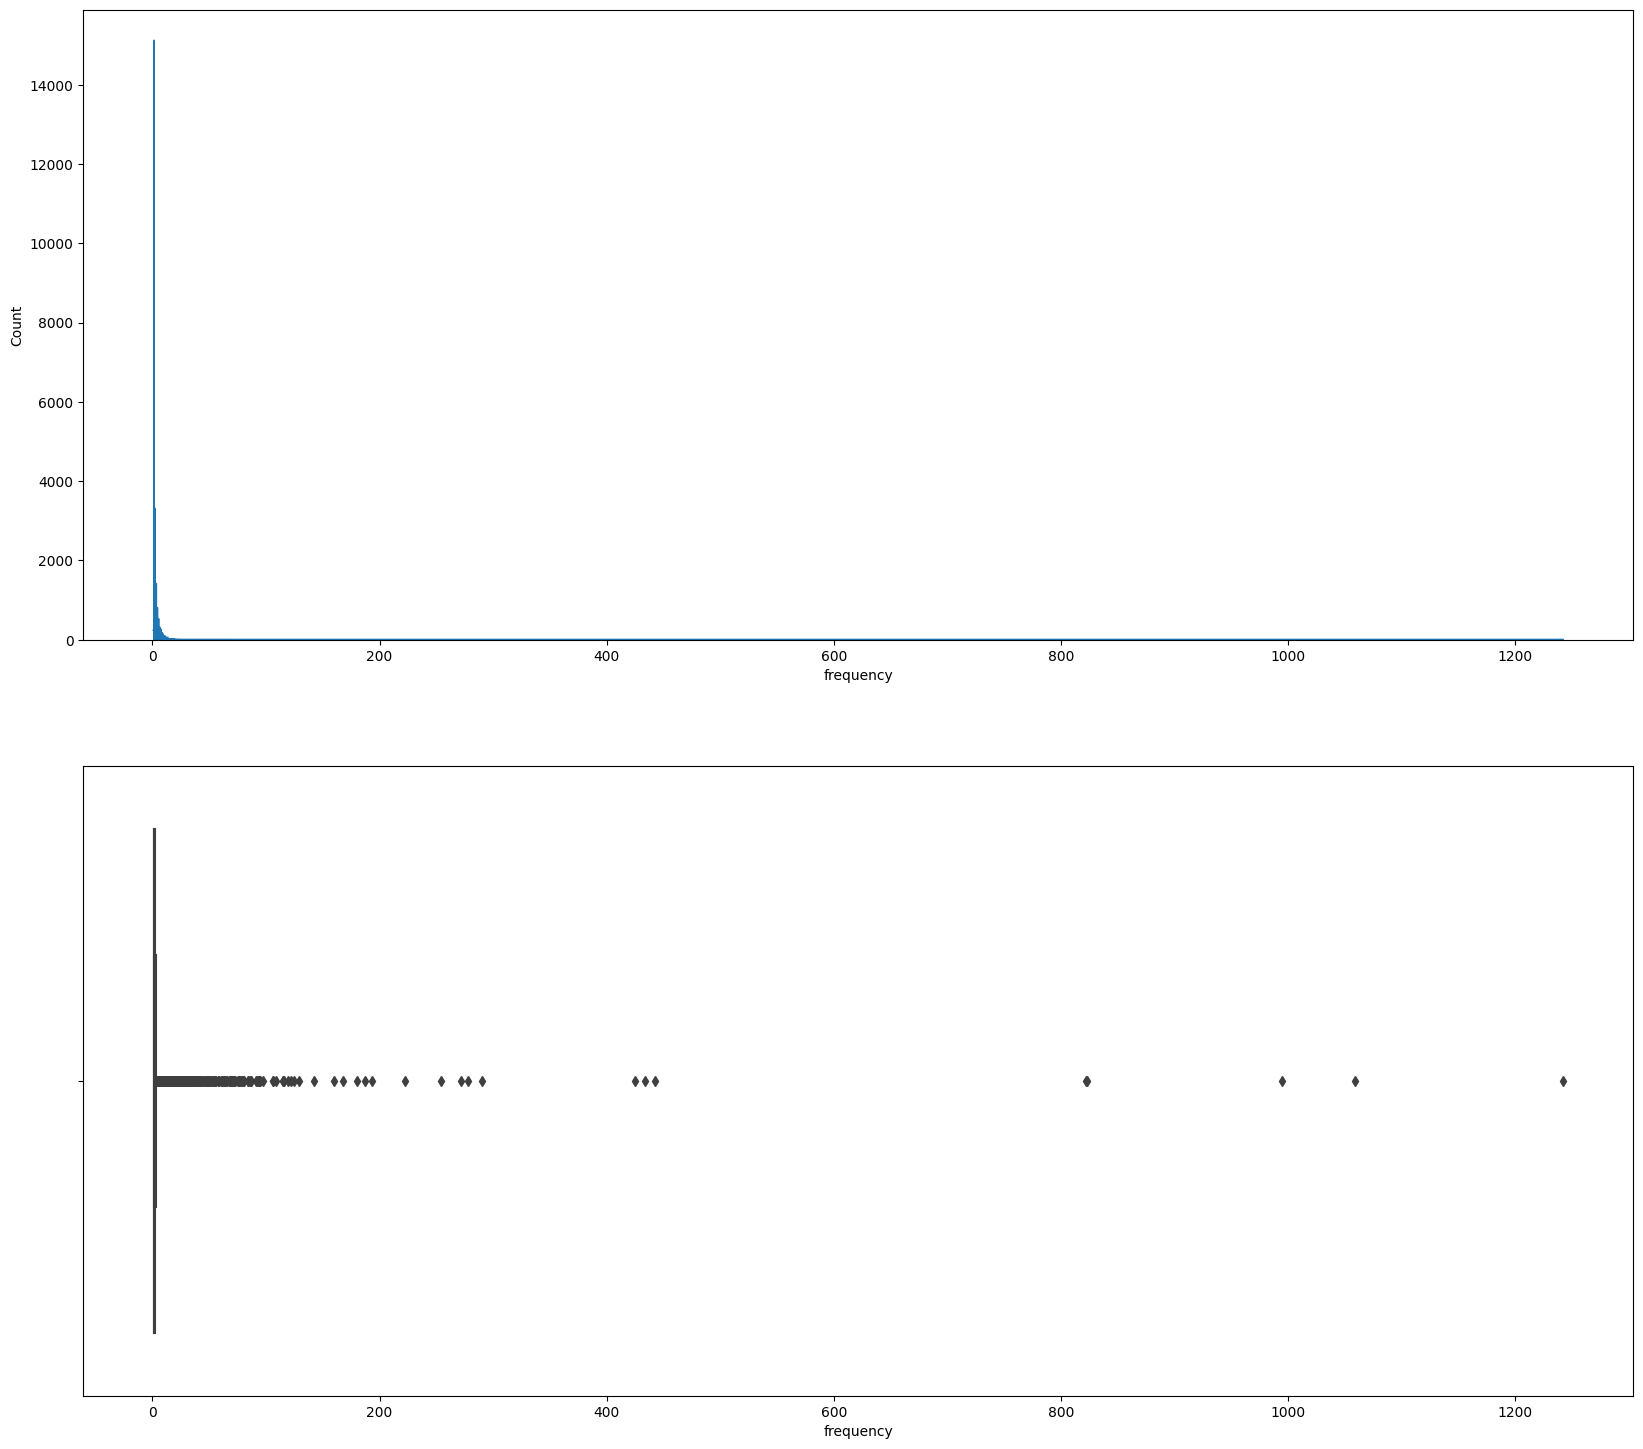

In [69]:
featureAnalysis('frequency',df)

In [70]:
df[df['frequency'] > 49]

,name,frequency
0,Warner Bros.,1242
1,Metro-Goldwyn-Mayer (MGM),1059
2,Paramount Pictures,995
3,Universal Pictures,823
4,Twentieth Century Fox Film Corporation,822
...,...,...
94,Zentropa Entertainments,51
95,Constantin Film Produktion,50
96,Golden Harvest Company,50
97,Fine Line Features,50


In [71]:
df[df['frequency'] > 49]['frequency'].sum()

14530

In [72]:
target_companies  = df[df['frequency'] > 49]['name'].tolist()

In [73]:
df[df['frequency'] > 990]

,name,frequency
0,Warner Bros.,1242
1,Metro-Goldwyn-Mayer (MGM),1059
2,Paramount Pictures,995


In [74]:
company1  = df[df['frequency'] > 990]['name'].tolist()

In [75]:
df[(df['frequency'] > 400) & (df['frequency'] < 900)]

,name,frequency
3,Universal Pictures,823
4,Twentieth Century Fox Film Corporation,822
5,Columbia Pictures Corporation,443
6,Canal+,434
7,Columbia Pictures,425


In [76]:
company2  = df[(df['frequency'] > 400) & (df['frequency'] < 900)]['name'].tolist()

In [77]:
df[(df['frequency'] > 100) & (df['frequency'] < 430)]

,name,frequency
7,Columbia Pictures,425
8,RKO Radio Pictures,290
9,United Artists,278
10,New Line Cinema,272
11,Walt Disney Pictures,254
12,Touchstone Pictures,222
13,TriStar Pictures,193
14,Mosfilm,187
15,Miramax Films,180
16,France 2 Cinéma,168


In [78]:
company3  = df[(df['frequency'] > 100) & (df['frequency'] < 431 )]['name'].tolist()

In [79]:
df[(df['frequency'] > 50) & (df['frequency'] < 101)]

,name,frequency
29,Lionsgate,97
30,Universal International Pictures (UI),95
31,Dimension Films,95
32,DreamWorks SKG,94
33,Wild Bunch,93
...,...,...
90,Pathé,52
91,Blumhouse Productions,52
92,Silver Pictures,52
93,Lenfilm,51


In [80]:
company4  = df[(df['frequency'] > 50) & (df['frequency'] < 101 )]['name'].tolist()

In [81]:
df[(df['frequency'] > 20) & (df['frequency'] < 51)]

,name,frequency
95,Constantin Film Produktion,50
96,Golden Harvest Company,50
97,Fine Line Features,50
98,Davis Entertainment,50
99,Arte,49
...,...,...
336,Atlas Entertainment,21
337,Alliance Films,21
338,Cecchi Gori Group Tiger Cinematografica,21
339,Avala Film,21


In [82]:
company5  = df[(df['frequency'] > 20) & (df['frequency'] < 51 )]['name'].tolist()

In [83]:
df[(df['frequency'] > 10) & (df['frequency'] < 21)]

,name,frequency
341,La Petite Reine,20
342,3 Arts Entertainment,20
343,Les Films Ariane,20
344,Robert Simonds Productions,20
345,Cattleya,20
...,...,...
848,Smart Egg Pictures,11
849,Indian Paintbrush,11
850,"Zespól Filmowy ""Kadr""",11
851,De Line Pictures,11


In [84]:
company6 = df[(df['frequency'] > 10) & (df['frequency'] < 21 )]['name'].tolist()

In [85]:
df[(df['frequency'] > 5) & (df['frequency'] < 11)]

,name,frequency
853,Terra-Filmkunst,10
854,Fastnet Films,10
855,Alpine Medien Productions,10
856,Universal,10
857,Fair Film,10
...,...,...
1927,Nina Saxon Film Design,6
1928,BMG Independents,6
1929,Malpaso Company,6
1930,Dragon Pictures,6


In [86]:
company7  = df[(df['frequency'] > 5) & (df['frequency'] < 11 )]['name'].tolist()

In [87]:
df[(df['frequency'] > 2) & (df['frequency'] < 6)]

,name,frequency
1932,Atlantic Releasing Corporation,5
1933,thefyzz,5
1934,Whizbang Films,5
1935,Tokuma Shoten,5
1936,Warp X,5
...,...,...
4726,H2F Entertainment,3
4727,Papphammar Produktion,3
4728,20th Century Fox Russia,3
4729,4th Row Films,3


In [88]:
company8  = df[(df['frequency'] > 2) & (df['frequency'] < 6 )]['name'].tolist()

In [89]:
df[df['frequency'] ==2]

,name,frequency
4731,Chi-Fou-Mi Productions,2
4732,Metaluna Productions,2
4733,A-1 Kino Video,2
4734,Edmund Grainger Productions,2
4735,Prime Universe Productions,2
...,...,...
8056,Axiom Films,2
8057,Somnium Films,2
8058,William Cagney Productions,2
8059,Sunset Productions,2


In [90]:
company9 = df[df['frequency'] ==2]['name'].tolist()

In [91]:
df[df['frequency'] ==1 ]

,name,frequency
8061,Phillip Productions,1
8062,How follows what,1
8063,Star Flow Entertainment,1
8064,American Screen Productions,1
8065,Double Secret Productions,1
...,...,...
23196,Concordia Compagnia Cinematografica,1
23197,Amicus Entertainment,1
23198,Alcina,1
23199,Kino Finland,1


In [92]:
company10 = df[df['frequency'] ==1]['name'].tolist()

In [93]:
movies_metadata['production_companies'] = movies_metadata['production_companies'].astype(str)
for company in target_companies:
    movies_metadata[company] = movies_metadata['production_companies'].apply(lambda x: 1 if company in x else 0)
movies_metadata['others_companies'] = movies_metadata[target_companies].sum(axis=1)
movies_metadata['others_companies'] = movies_metadata['others_companies'].apply(lambda x: 1 if x == 0 else 0)

In [94]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,0,0,0,0,1
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,"[{'id': 878, 'name': 'Science Fiction'}]",222848,tt0112613,en,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,...,0,0,0,0,0,0,0,0,0,1
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0,0,0,0,0,0,0,0,0,0
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,1
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,others,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
for i in range(1, 11):
    company_list = eval(f'company{i}')
    feature_name = f'company_{i}'
    movies_metadata[feature_name] = movies_metadata['production_companies'].apply(lambda x: 1 if any(company in x for company in company_list) else 0)

In [96]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,1,0,0,0,0,1
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,1,0,1,0,0,0,1,1
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,1,0,0,0,0,0,0,0,1,0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,1,0,1,0,0,0,1,1,0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,"[{'id': 878, 'name': 'Science Fiction'}]",222848,tt0112613,en,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,...,0,0,0,0,0,1,0,1,0,0
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0,0,0,1,1,0,1,1,1,0
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,others,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,1


# 

<a name="3.7"></a>
**Production_countries**

In [97]:
movies_metadata = movies_metadata[movies_metadata['production_countries'] != '[]']

In [98]:
movies_metadata['production_countries'].isnull().sum()

0

In [99]:
movies_metadata['production_countries']

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45459    [{'iso_3166_1': 'US', 'name': 'United States o...
45460    [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, Length: 38289, dtype: object

In [100]:
movies_metadata['production_countries'] = movies_metadata['production_countries'].astype(str)

In [101]:
production_countries = movies_metadata.copy()

In [102]:
production_countries_df = json_to_DF(production_countries , 'production_countries' )
production_countries_df

,name,frequency
0,United States of America,20907
1,United Kingdom,4040
2,France,3845
3,Germany,2211
4,Italy,2068
...,...,...
152,Madagascar,1
153,United States Minor Outlying Islands,1
154,Cayman Islands,1
155,Martinique,1


In [225]:
country_names = production_countries_df["name"].tolist()
country_names

['United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Italy',
 'Canada',
 'Japan',
 'Spain',
 'Russia',
 'India',
 'Hong Kong',
 'Sweden',
 'Australia',
 'South Korea',
 'Belgium',
 'Denmark',
 'Netherlands',
 'China',
 'Finland',
 'Mexico',
 'Poland',
 'Brazil',
 'Switzerland',
 'Argentina',
 'Ireland',
 'Czech Republic',
 'Norway',
 'Austria',
 'Hungary',
 'Greece',
 'Turkey',
 'Israel',
 'Romania',
 'South Africa',
 'New Zealand',
 'Taiwan',
 'Portugal',
 'Thailand',
 'Serbia',
 'Iran',
 'Luxembourg',
 'Philippines',
 'Croatia',
 'Iceland',
 'Chile',
 'Bulgaria',
 'Estonia',
 'Ukraine',
 'Singapore',
 'Bosnia and Herzegovina',
 'Lithuania',
 'Colombia',
 'Slovenia',
 'Indonesia',
 'Morocco',
 'Georgia',
 'Peru',
 'Slovakia',
 'Latvia',
 'United Arab Emirates',
 'Egypt',
 'Cuba',
 'Kazakhstan',
 'Venezuela',
 'Soviet Union',
 'Tunisia',
 'Uruguay',
 'Pakistan',
 'Macedonia',
 'Lebanon',
 'Qatar',
 'Senegal',
 'Malaysia',
 'Puerto Rico',
 'Algeria',
 'Palestinian Te

,count,mean,std,min,25%,50%,75%,max
frequency,157.0,307.949045,1741.336573,1.0,3.0,10.0,104.0,20907.0


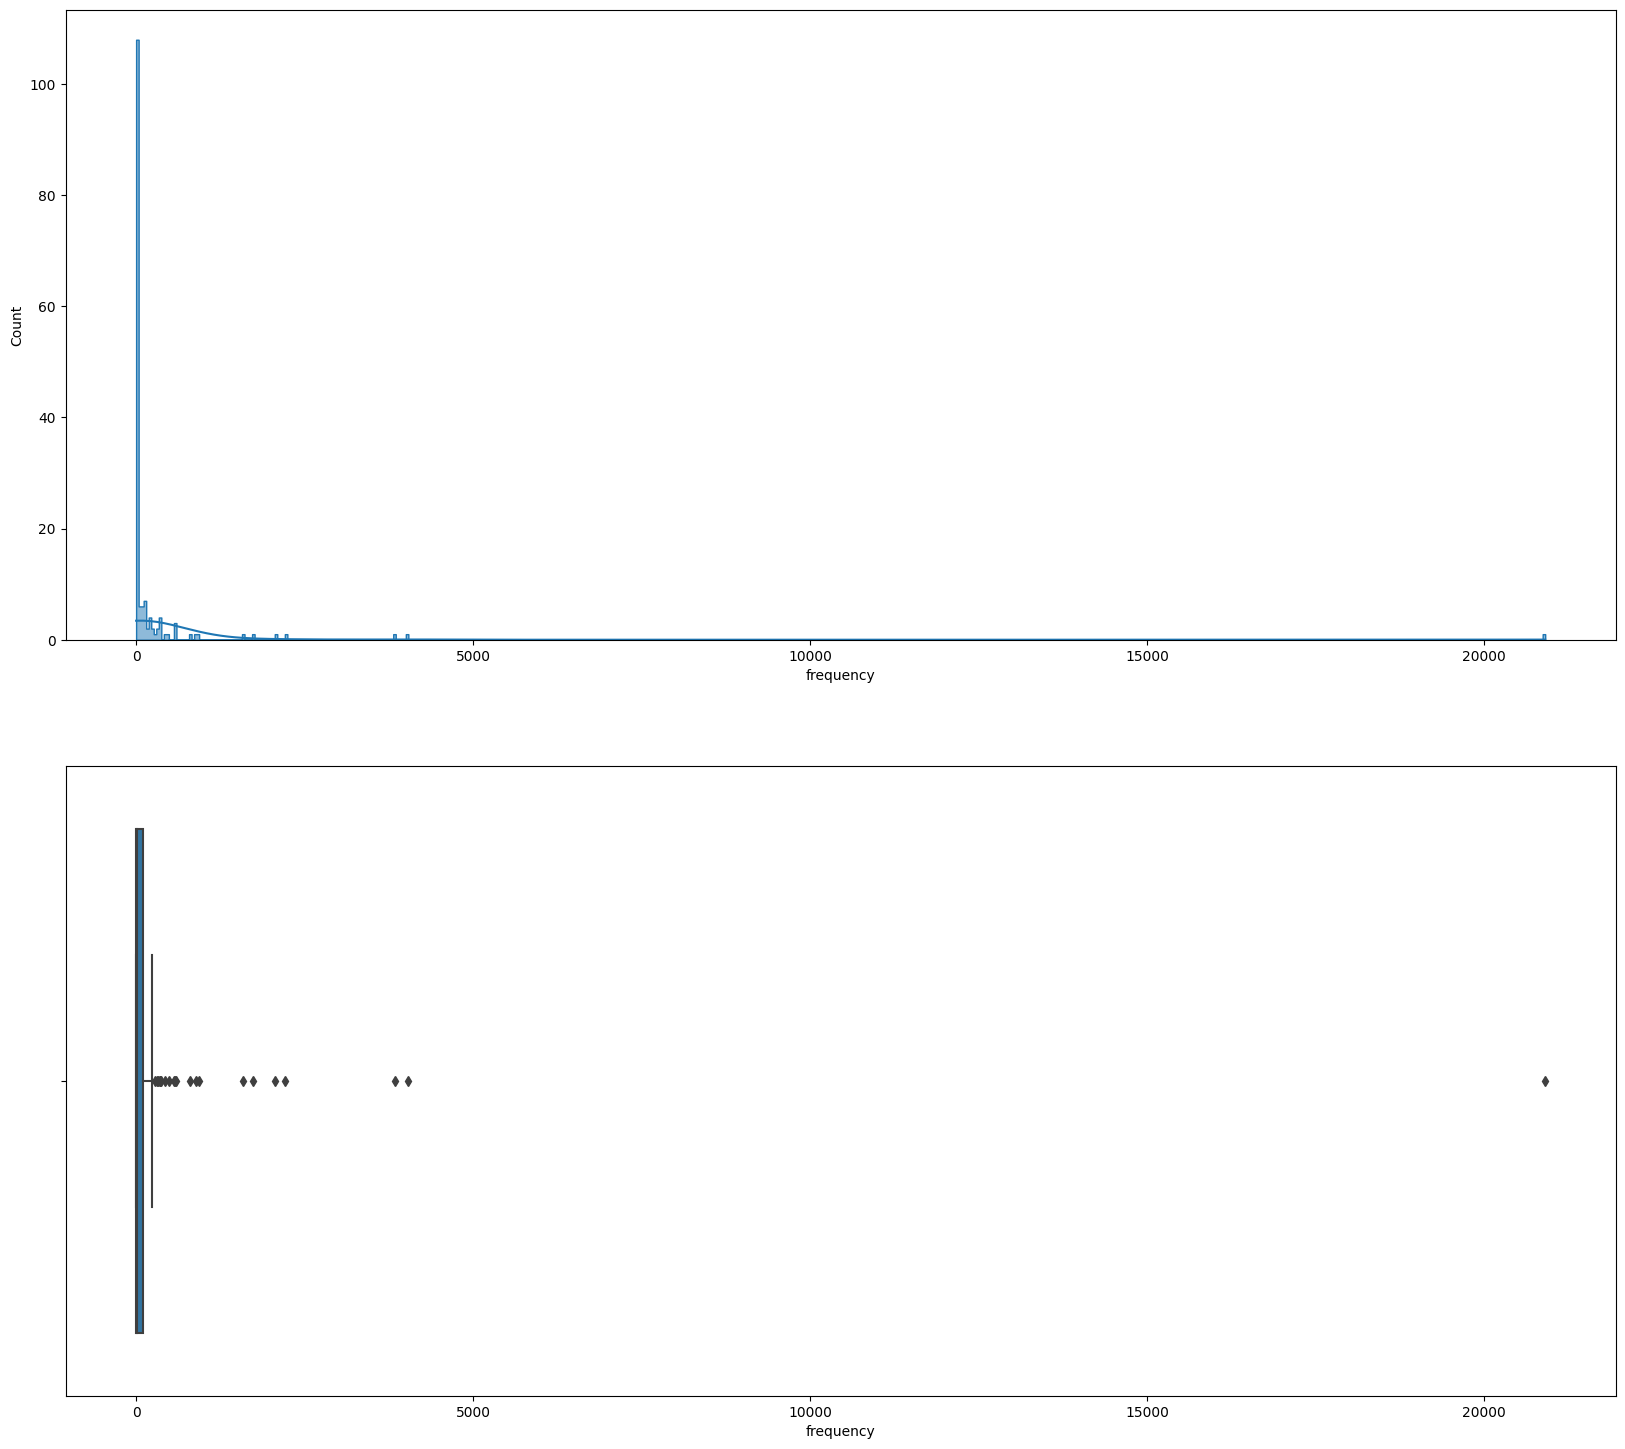

In [103]:
featureAnalysis('frequency',production_countries_df)

In [104]:
production_countries_df[production_countries_df['frequency'] > 10]

,name,frequency
0,United States of America,20907
1,United Kingdom,4040
2,France,3845
3,Germany,2211
4,Italy,2068
...,...,...
71,Senegal,14
72,Malaysia,12
73,Puerto Rico,12
74,Algeria,12


In [105]:
target_countries = production_countries_df[production_countries_df['frequency'] > 10]['name'].tolist()

In [106]:
for country in target_countries:
    movies_metadata[country] = movies_metadata['production_countries'].apply(lambda x: 1 if country in x else 0)

movies_metadata['others_country'] = movies_metadata[target_countries].sum(axis=1)
movies_metadata['others_country'] = movies_metadata['others_country'].apply(lambda x: 1 if x == 0 else 0)

In [107]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,0,0,0,0,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,"[{'id': 878, 'name': 'Science Fiction'}]",222848,tt0112613,en,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,...,0,0,0,0,0,0,0,0,0,0
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0,0,0,0,0,0,0,0,0,0
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,others,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
movies_metadata.columns.tolist()

['budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'original_language_ar',
 'original_language_cn',
 'original_language_cs',
 'original_language_da',
 'original_language_de',
 'original_language_el',
 'original_language_en',
 'original_language_es',
 'original_language_fa',
 'original_language_fi',
 'original_language_fr',
 'original_language_he',
 'original_language_hi',
 'original_l

# 

<a name="3.8"></a>
**Spoken_languages**

In [109]:
movies_metadata = movies_metadata[movies_metadata['spoken_languages'] != '[]']

In [110]:
Spoken_languages = movies_metadata.copy()

In [111]:
Spoken_languages_df = json_to_DF(Spoken_languages , 'spoken_languages' )
Spoken_languages_df

,name,frequency
0,English,25975
1,Français,3928
2,Deutsch,2407
3,Español,2209
4,Italiano,2096
...,...,...
70,беларуская мова,2
71,Fulfulde,2
72,Bokmål,1
73,ozbek,1


In [112]:
Spoken_languages_df[Spoken_languages_df['frequency'] > 10 ]

,name,frequency
0,English,25975
1,Français,3928
2,Deutsch,2407
3,Español,2209
4,Italiano,2096
5,日本語,1636
6,Pусский,1455
7,普通话,726
8,हिन्दी,587
9,Português,546


In [113]:
targetLanguage = Spoken_languages_df[Spoken_languages_df['frequency'] > 10 ]['name'].tolist()

In [114]:
movies_metadata['spoken_languages'] = movies_metadata['spoken_languages'].astype(str)
for language in targetLanguage:
    movies_metadata[language] = movies_metadata['spoken_languages'].apply(lambda x: 1 if company in x else 0)
movies_metadata['others_spoken_languages'] = movies_metadata[targetLanguage].sum(axis=1)
movies_metadata['others_spoken_languages'] = movies_metadata['others_spoken_languages'].apply(lambda x: 1 if x == 0 else 0)

In [115]:
 movies_metadata.drop([''],inplace=True,axis =1)

In [116]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,Slovenščina,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,0,0,0,0,1
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,0,0,0,0,1
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,0,0,0,0,1
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,1
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,"[{'id': 878, 'name': 'Science Fiction'}]",222848,tt0112613,en,0.661558,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,...,0,0,0,0,0,0,0,0,0,1
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0,0,0,0,0,0,0,0,0,1
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,1
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,others,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
movies_metadata.columns.tolist()

['budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'original_language_ar',
 'original_language_cn',
 'original_language_cs',
 'original_language_da',
 'original_language_de',
 'original_language_el',
 'original_language_en',
 'original_language_es',
 'original_language_fa',
 'original_language_fi',
 'original_language_fr',
 'original_language_he',
 'original_language_hi',
 'original_l

# 

<a name="4"></a>
## Preprocessing

In [118]:
features_to_remove = ['genres', 'original_language', 'production_companies', 'production_countries','spoken_languages' ]
movies_metadata = movies_metadata.drop(features_to_remove, axis=1)
movies_metadata

,budget,id,imdb_id,popularity,release_date,revenue,runtime,vote_average,vote_count,video_False,...,Slovenščina,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages
0,30000000,862,tt0114709,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,1,...,0,0,0,0,0,0,0,0,0,1
1,65000000,8844,tt0113497,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,15602,tt0113228,11.7129,1995-12-22,0.0,101.0,6.5,92.0,1,...,0,0,0,0,0,0,0,0,0,1
3,16000000,31357,tt0114885,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,11862,tt0113041,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,222848,tt0112613,0.661558,1995-01-01,0.0,85.0,3.5,1.0,1,...,0,0,0,0,0,0,0,0,0,1
45460,0,30840,tt0102797,5.683753,1991-05-13,0.0,104.0,5.7,26.0,1,...,0,0,0,0,0,0,0,0,0,1
45461,0,439050,tt6209470,0.072051,NaN,0.0,90.0,4.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1
45462,0,111109,tt2028550,0.178241,2011-11-17,0.0,360.0,9.0,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [119]:
movies_metadata.isnull().sum().tolist()

[0,
 0,
 8,
 0,
 9,
 0,
 95,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [120]:
movies_metadata = movies_metadata.dropna()

In [121]:
movies_metadata.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [122]:
movies_metadata

,budget,id,imdb_id,popularity,release_date,revenue,runtime,vote_average,vote_count,video_False,...,Slovenščina,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages
0,30000000,862,tt0114709,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,1,...,0,0,0,0,0,0,0,0,0,1
1,65000000,8844,tt0113497,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,15602,tt0113228,11.7129,1995-12-22,0.0,101.0,6.5,92.0,1,...,0,0,0,0,0,0,0,0,0,1
3,16000000,31357,tt0114885,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,11862,tt0113041,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,0,289923,tt0252966,0.38645,2000-10-03,0.0,30.0,7.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1
45459,0,222848,tt0112613,0.661558,1995-01-01,0.0,85.0,3.5,1.0,1,...,0,0,0,0,0,0,0,0,0,1
45460,0,30840,tt0102797,5.683753,1991-05-13,0.0,104.0,5.7,26.0,1,...,0,0,0,0,0,0,0,0,0,1
45462,0,111109,tt2028550,0.178241,2011-11-17,0.0,360.0,9.0,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [123]:
movies_metadata.columns.tolist()

['budget',
 'id',
 'imdb_id',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'original_language_ar',
 'original_language_cn',
 'original_language_cs',
 'original_language_da',
 'original_language_de',
 'original_language_el',
 'original_language_en',
 'original_language_es',
 'original_language_fa',
 'original_language_fi',
 'original_language_fr',
 'original_language_he',
 'original_language_hi',
 'original_language_hu',
 'original_language_it',
 'original_language_ja',
 'original_language_ko',
 'original_langu

**Date**

In [124]:
movies_metadata["year"] = movies_metadata["release_date"].str.split("-").str[0]

In [125]:
movies_metadata["year"] = movies_metadata["year"].astype(int) 

,count,mean,std,min,25%,50%,75%,max
year,37256.0,1991.338308,23.98688,1874.0,1976.0,2001.0,2010.0,2020.0


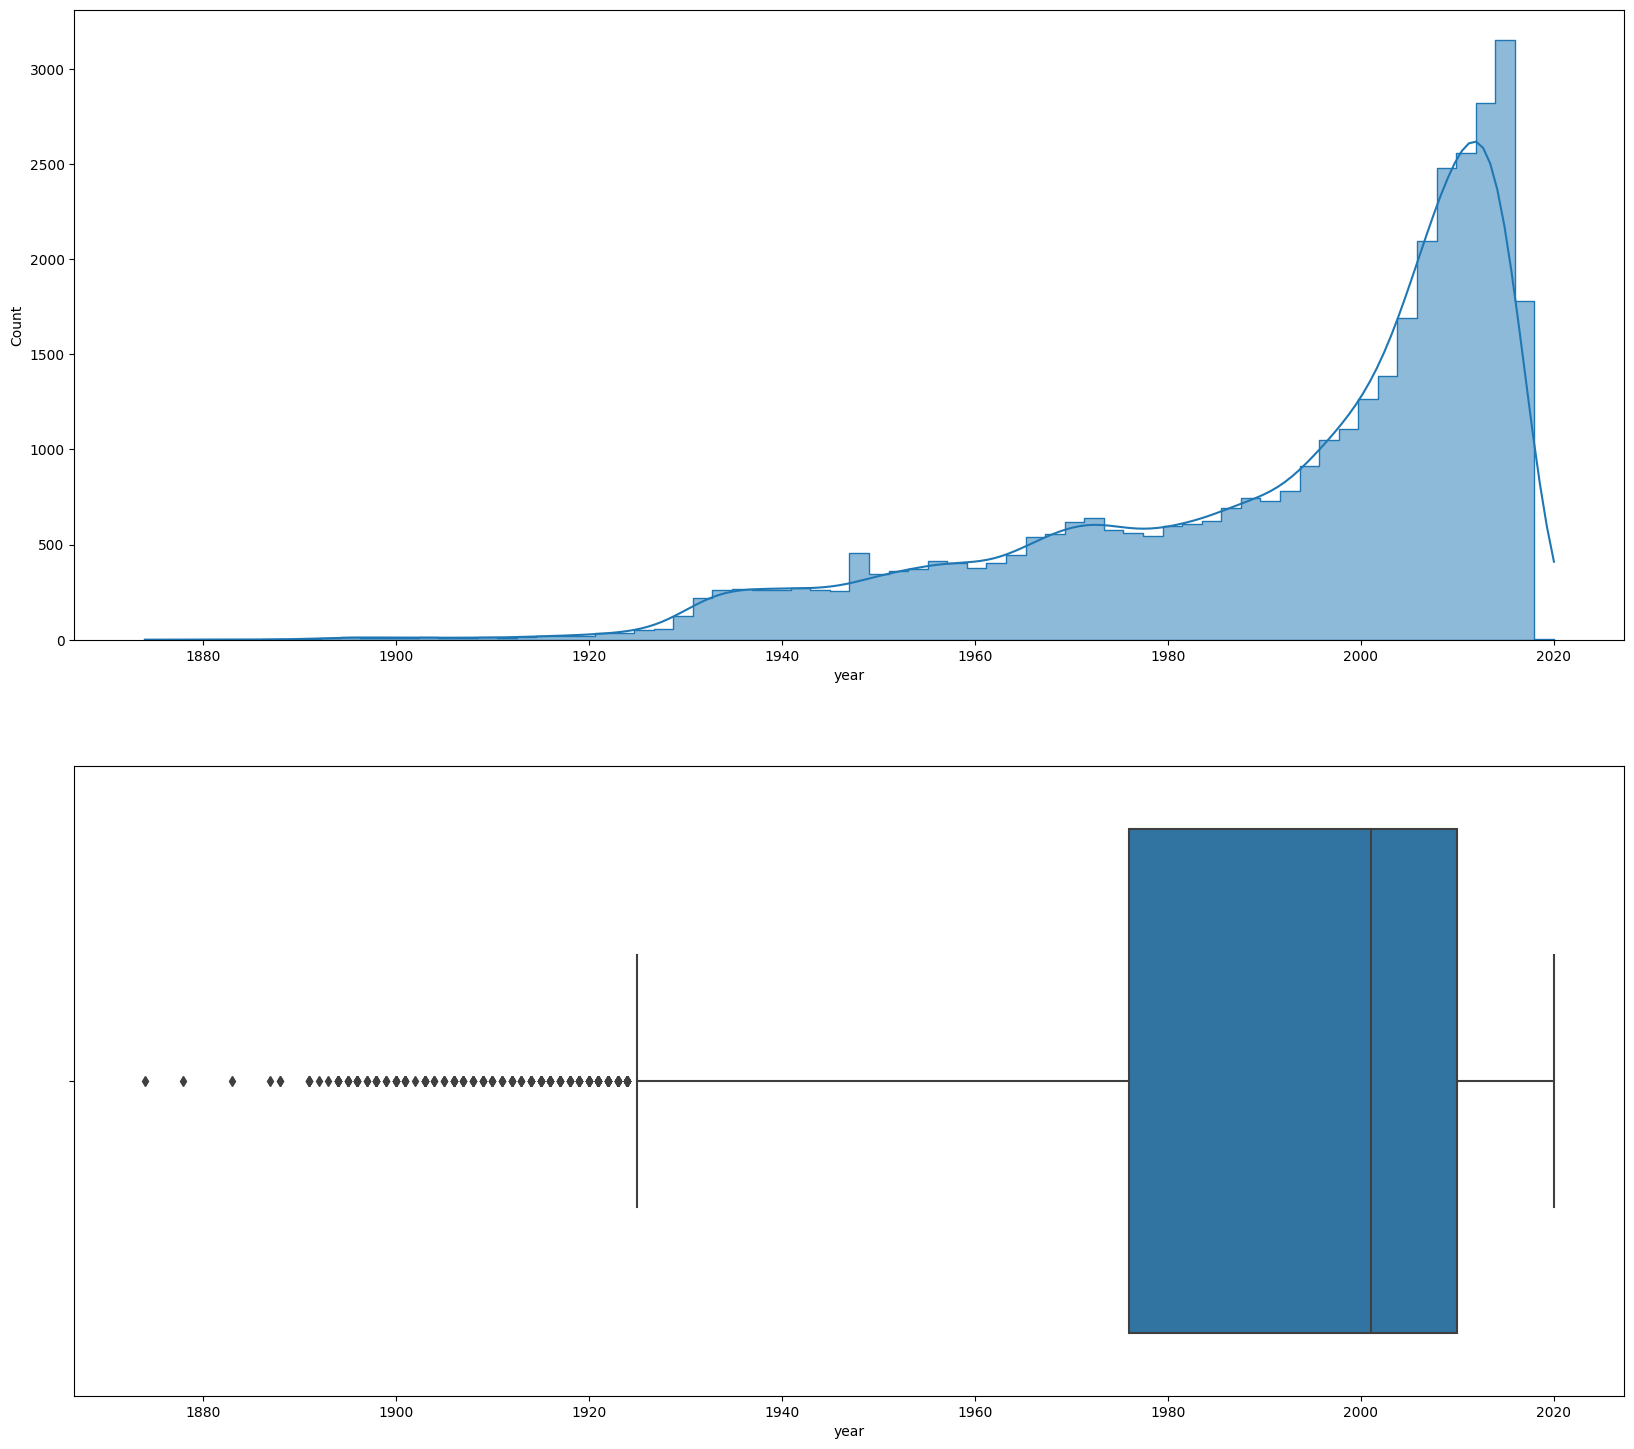

In [126]:
featureAnalysis("year",movies_metadata)

In [127]:
movies_metadata.loc[1]['release_date'] > movies_metadata.loc[2]['release_date'] 

False

In [128]:
movies_metadata.loc[1]['release_date']

'1995-12-15'

In [129]:
movies_metadata.loc[2]['release_date'] 

'1995-12-22'

# 

**popularity**

In [130]:
movies_metadata["popularity"].describe() 

count     37256.000000
unique    36710.000000
top           0.000844
freq         21.000000
Name: popularity, dtype: float64

In [131]:
movies_metadata["popularity"] = movies_metadata["popularity"].astype(float) 

,count,mean,std,min,25%,50%,75%,max
popularity,37256.0,3.428575,6.505267,0.0,0.570611,1.505955,4.815951,547.488298


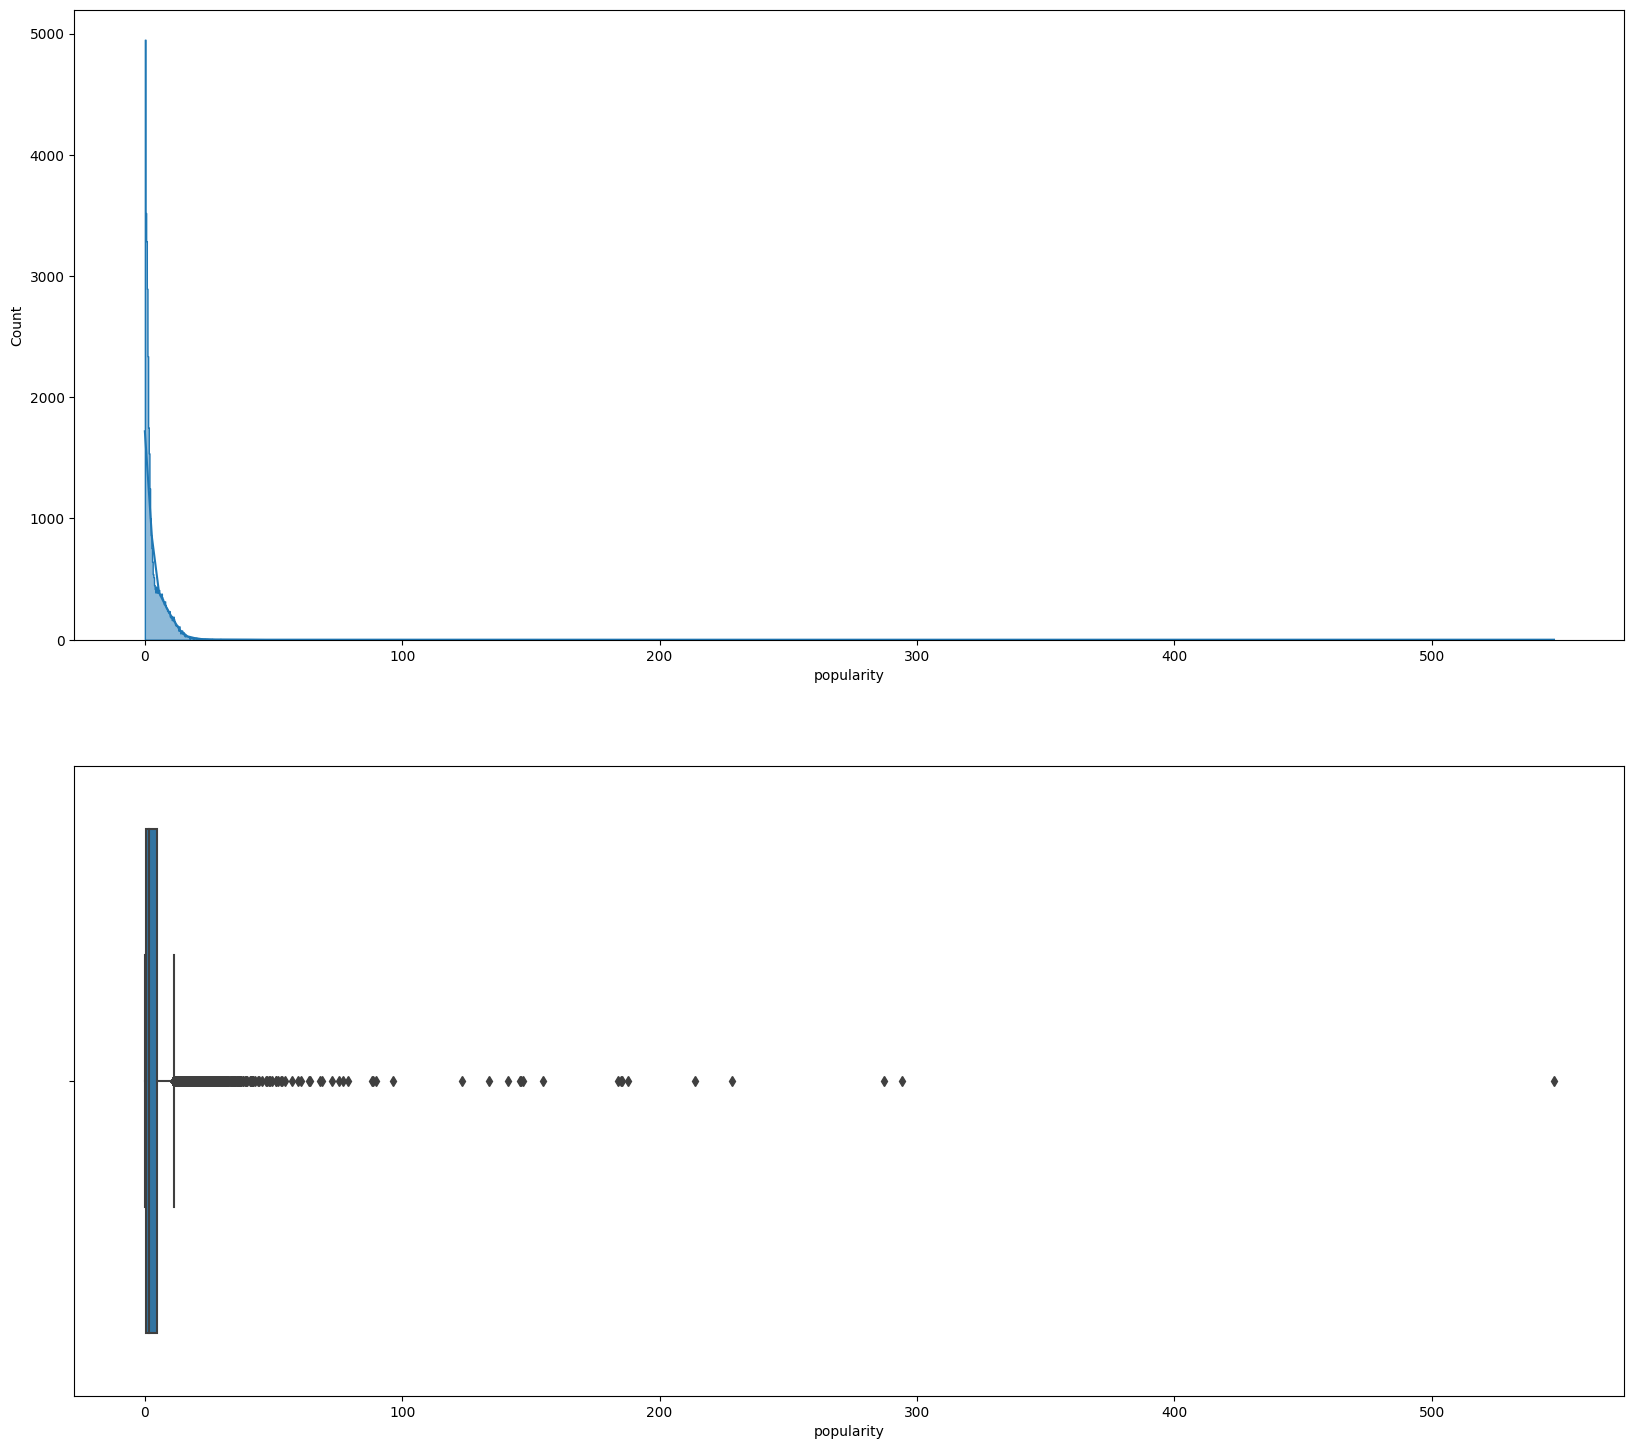

In [132]:
featureAnalysis("popularity",movies_metadata)

### 

**budget & revenue**

,count,mean,std,min,25%,50%,75%,max
revenue,37256.0,1.365513e+07,7.082322e+07,0.0,0.0,0.0,0.0,2.787965e+09


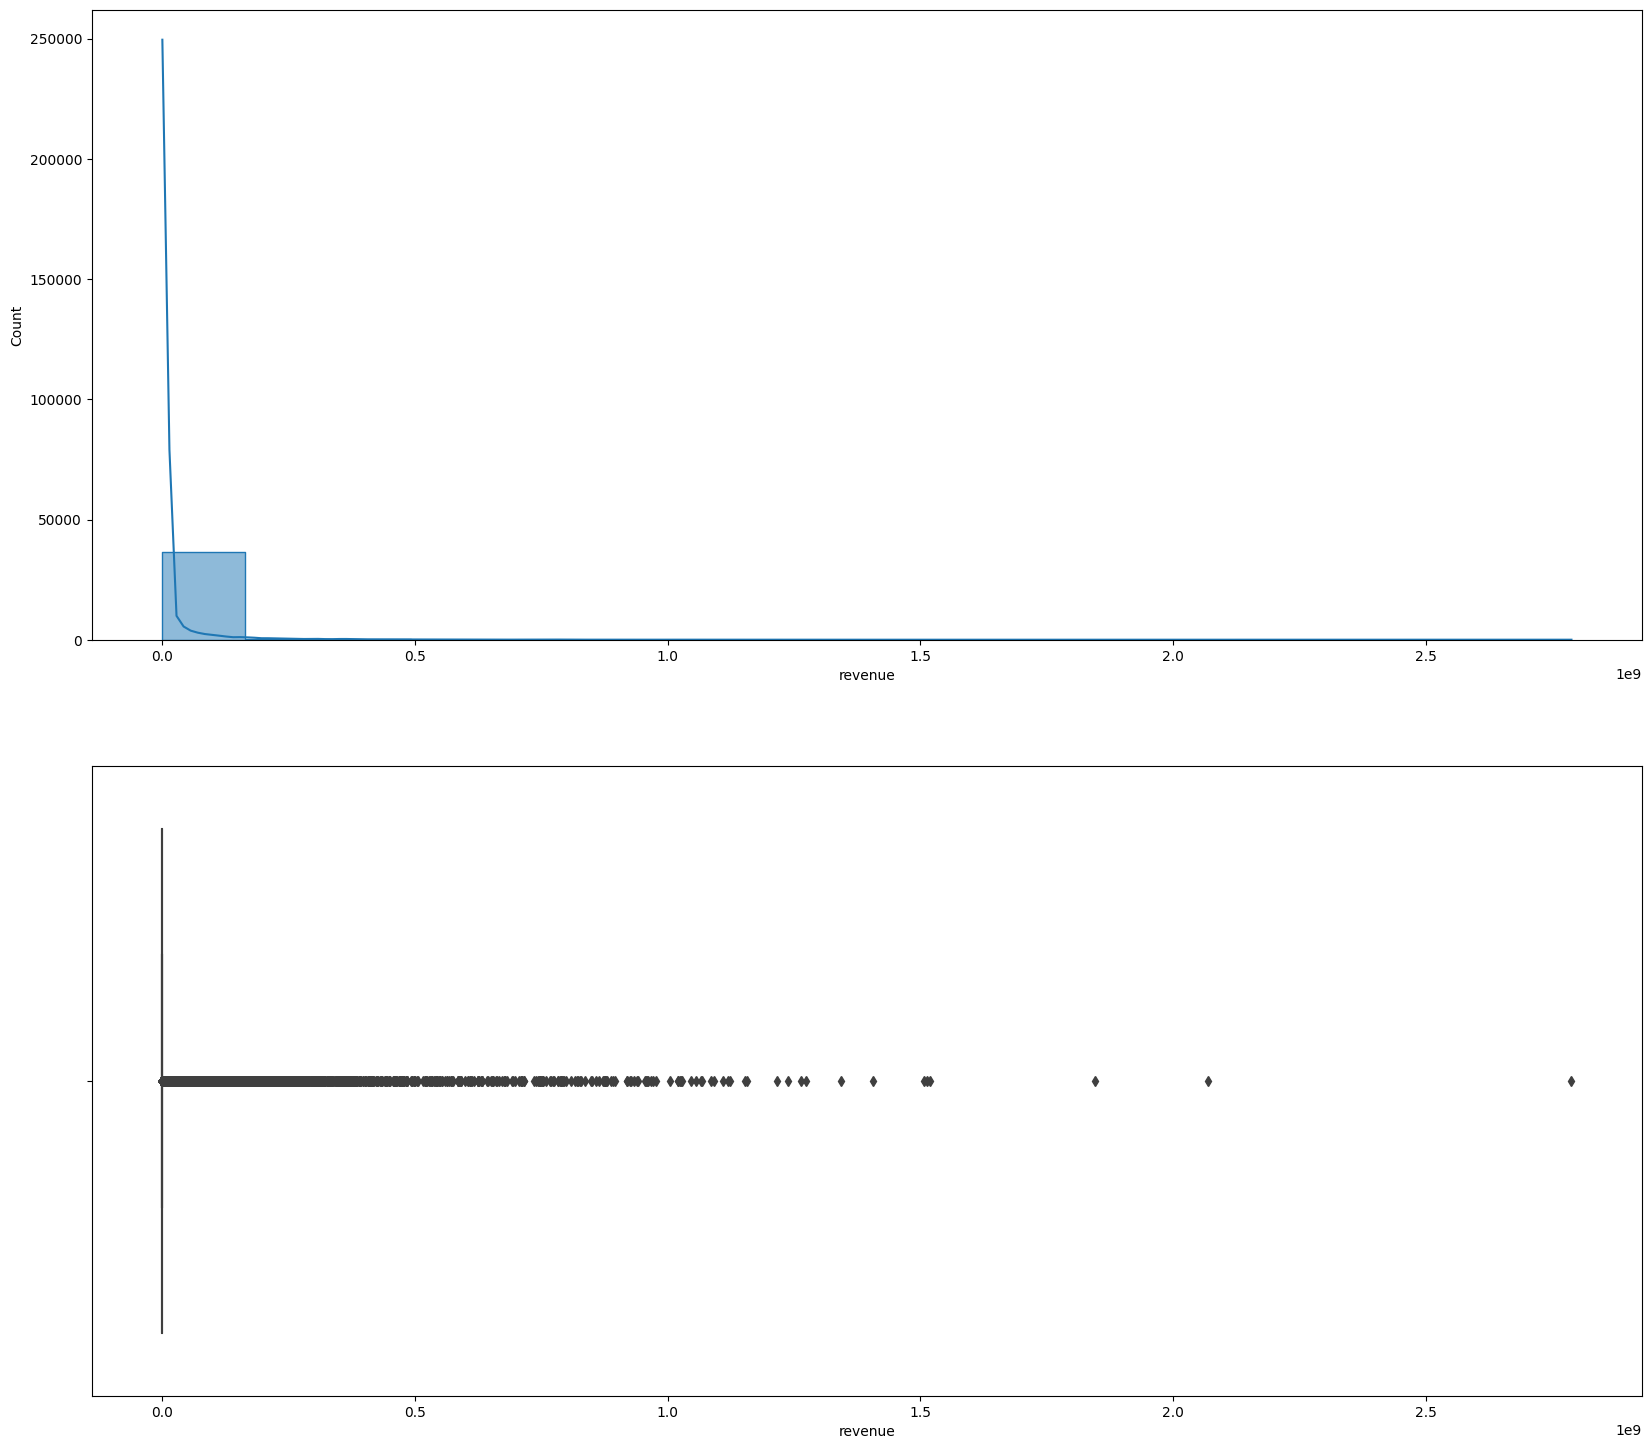

In [133]:
featureAnalysis("revenue",movies_metadata)

In [134]:
movies_metadata[movies_metadata['revenue'] == 0].shape[0] / movies_metadata.shape[0]

0.8063399184024049

In [135]:
movies_metadata["budget"] = movies_metadata["budget"].astype(int) 

,count,mean,std,min,25%,50%,75%,max
budget,37256.0,5.123702e+06,1.911400e+07,0.0,0.0,0.0,0.0,380000000.0


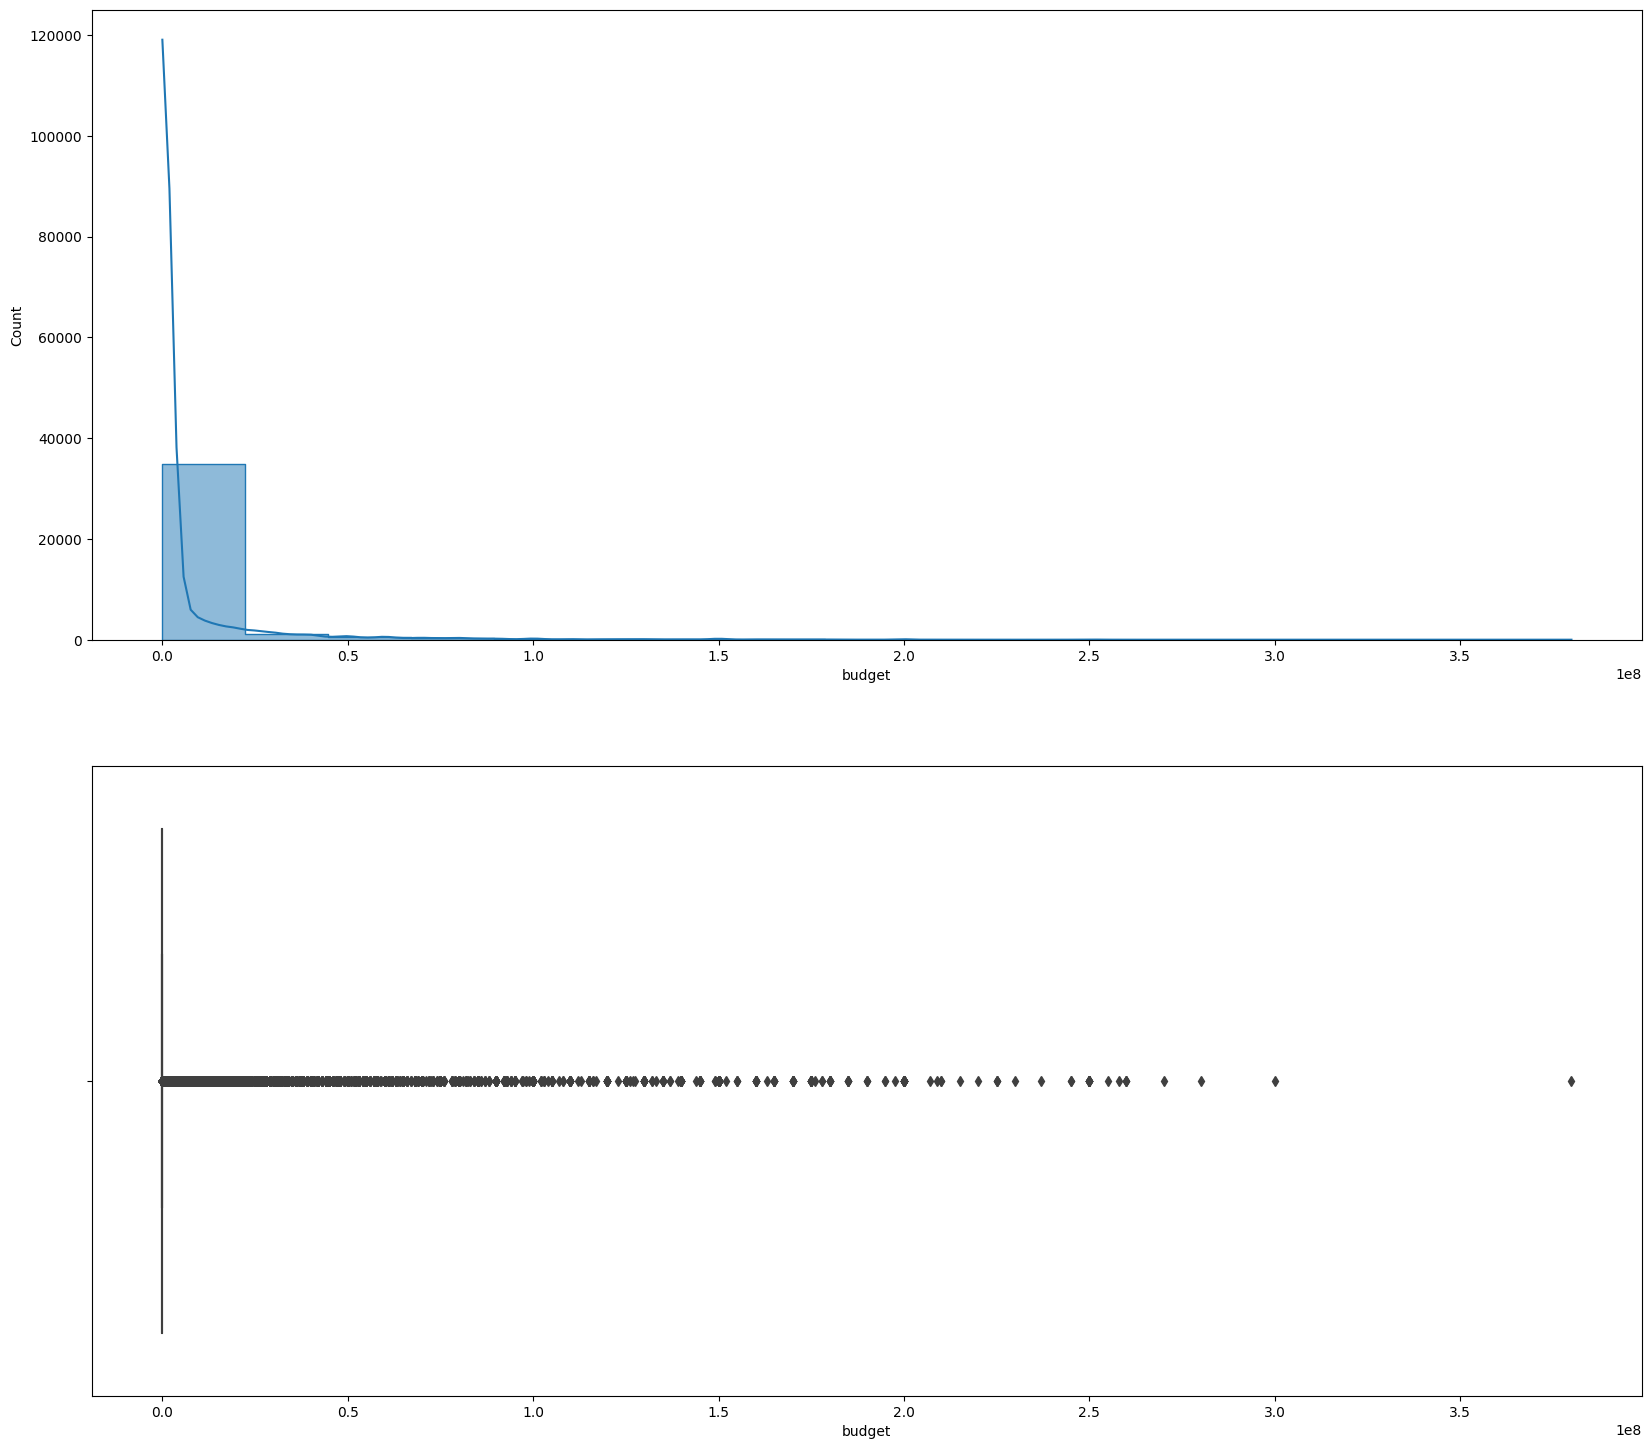

In [136]:
featureAnalysis("budget",movies_metadata)

In [137]:
movies_metadata[movies_metadata['budget'] == 0].shape[0] / movies_metadata.shape[0]

0.7717146231479494

We are using tmdb API's to fill the empty revenues and budgets.

In [138]:
base_url = "https://api.themoviedb.org/3/movie/"
api_key = "472e2704058f006afadf4185fdd9feda"

In [139]:
import concurrent.futures
import requests

# Define the function to fetch movie details
def fetch_movie_details(row):
    if (row["revenue"] == 0) or (row["budget"] == 0):
        url = f"{base_url}{row['imdb_id']}?api_key={api_key}"
        response = requests.get(url)
        movie_data = response.json()

        revenue = movie_data.get("revenue")
        budget = movie_data.get("budget")

        return (revenue, budget)
    else:
        return None

# Set the maximum number of concurrent threads
max_threads = 40
zero_counter = 0
# Create a thread pool executor
with concurrent.futures.ThreadPoolExecutor(max_workers=max_threads) as executor:
    # Submit the tasks for each row in parallel
    future_to_row = {executor.submit(fetch_movie_details, row): row for _, row in movies_metadata.iterrows()}

    # Process the results as they become available
    for future in concurrent.futures.as_completed(future_to_row):
        row = future_to_row[future]
        try:
            revenue, budget = future.result()
            if revenue is not None and budget is not None:
                movies_metadata.at[row.name, "revenue"] = revenue
                movies_metadata.at[row.name, "budget"] = budget
        except Exception as e:
            zero_counter += 1 


,count,mean,std,min,25%,50%,75%,max
revenue,37256.0,1.473534e+07,7.233403e+07,0.0,0.0,0.0,37010.25,2.787965e+09


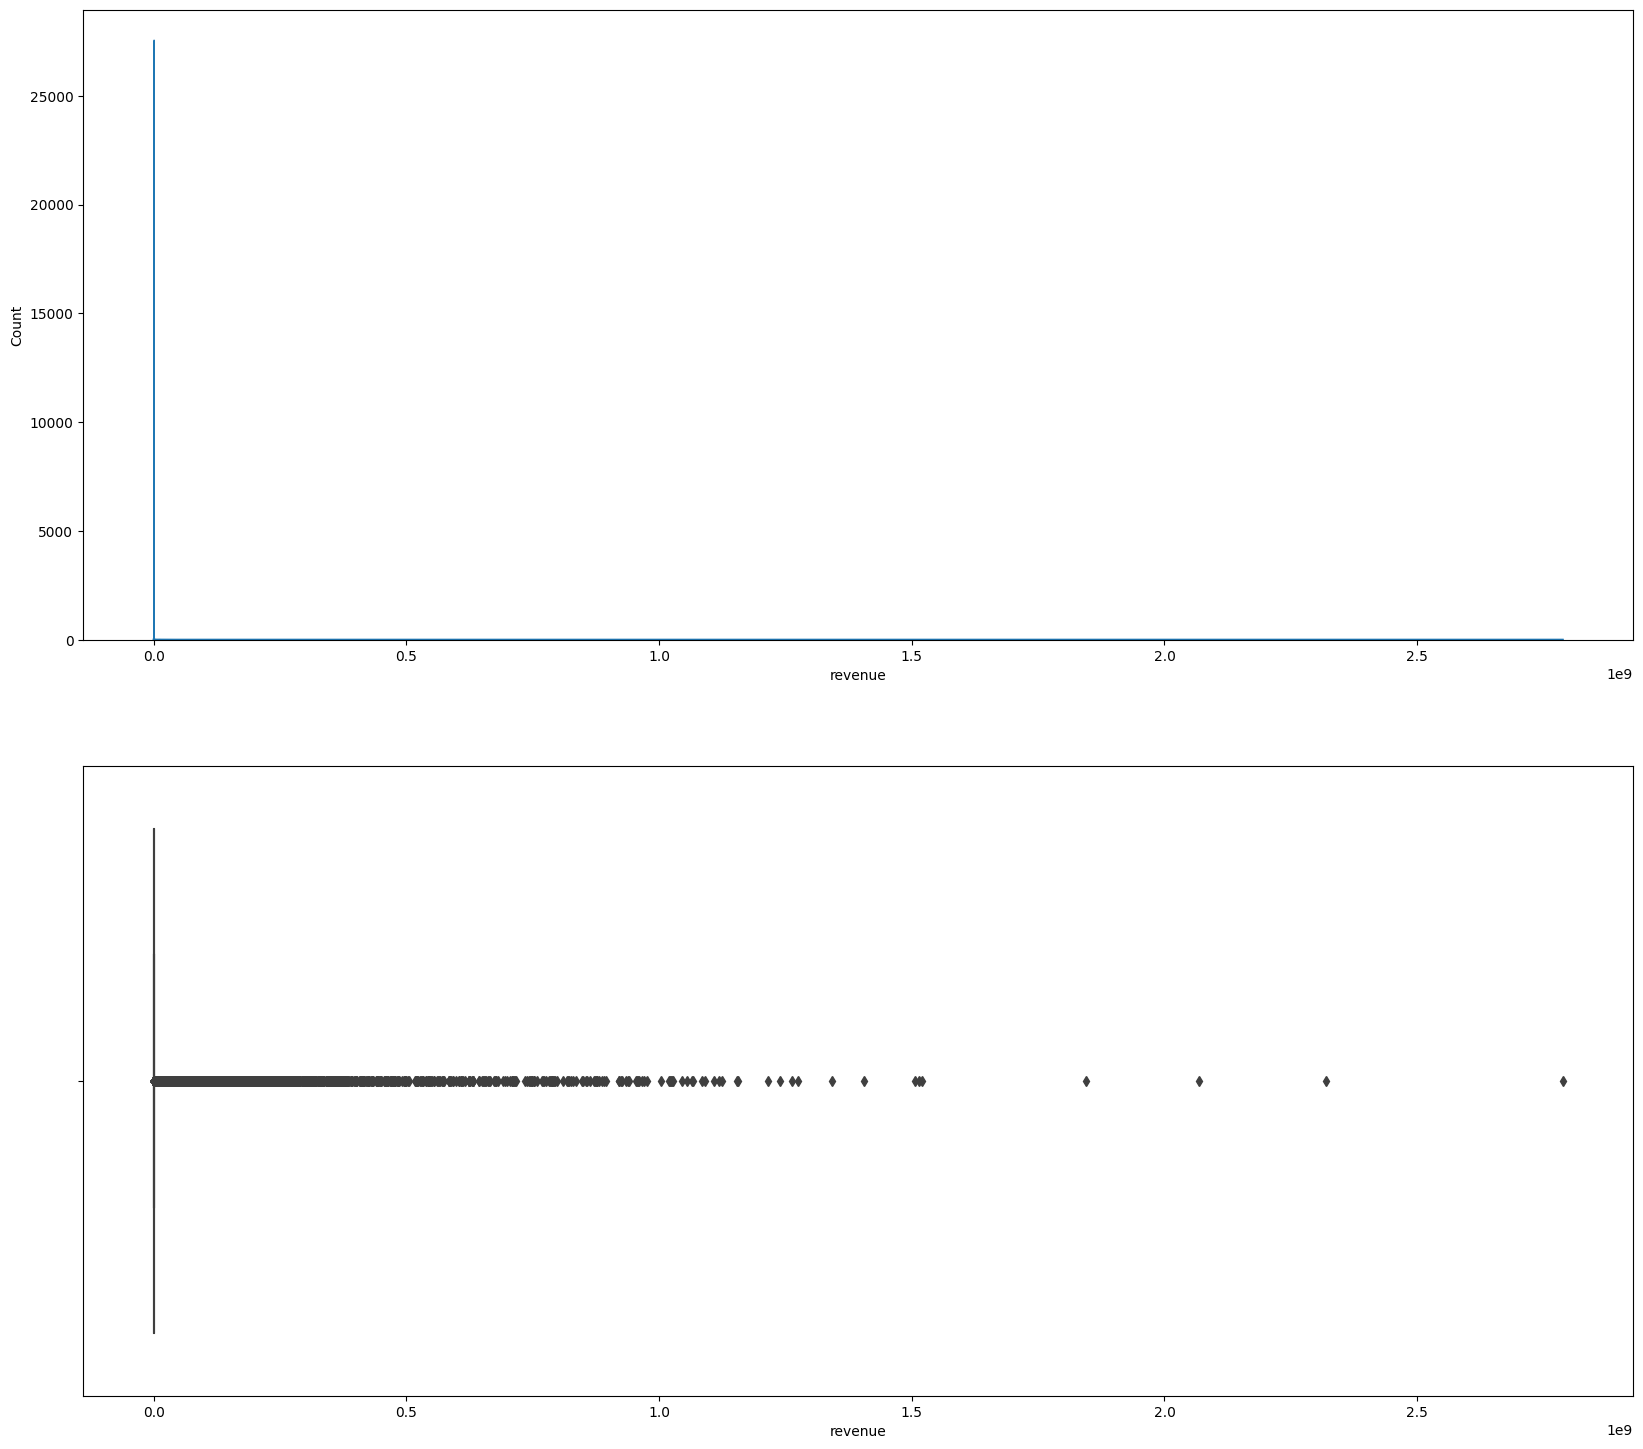

In [140]:
featureAnalysis("revenue",movies_metadata)

In [141]:
movies_metadata[movies_metadata['revenue'] == 0].shape[0] / movies_metadata.shape[0]

0.7361767232123685

,count,mean,std,min,25%,50%,75%,max
budget,37256.0,5.574181e+06,1.949807e+07,0.0,0.0,0.0,472675.0,460000000.0


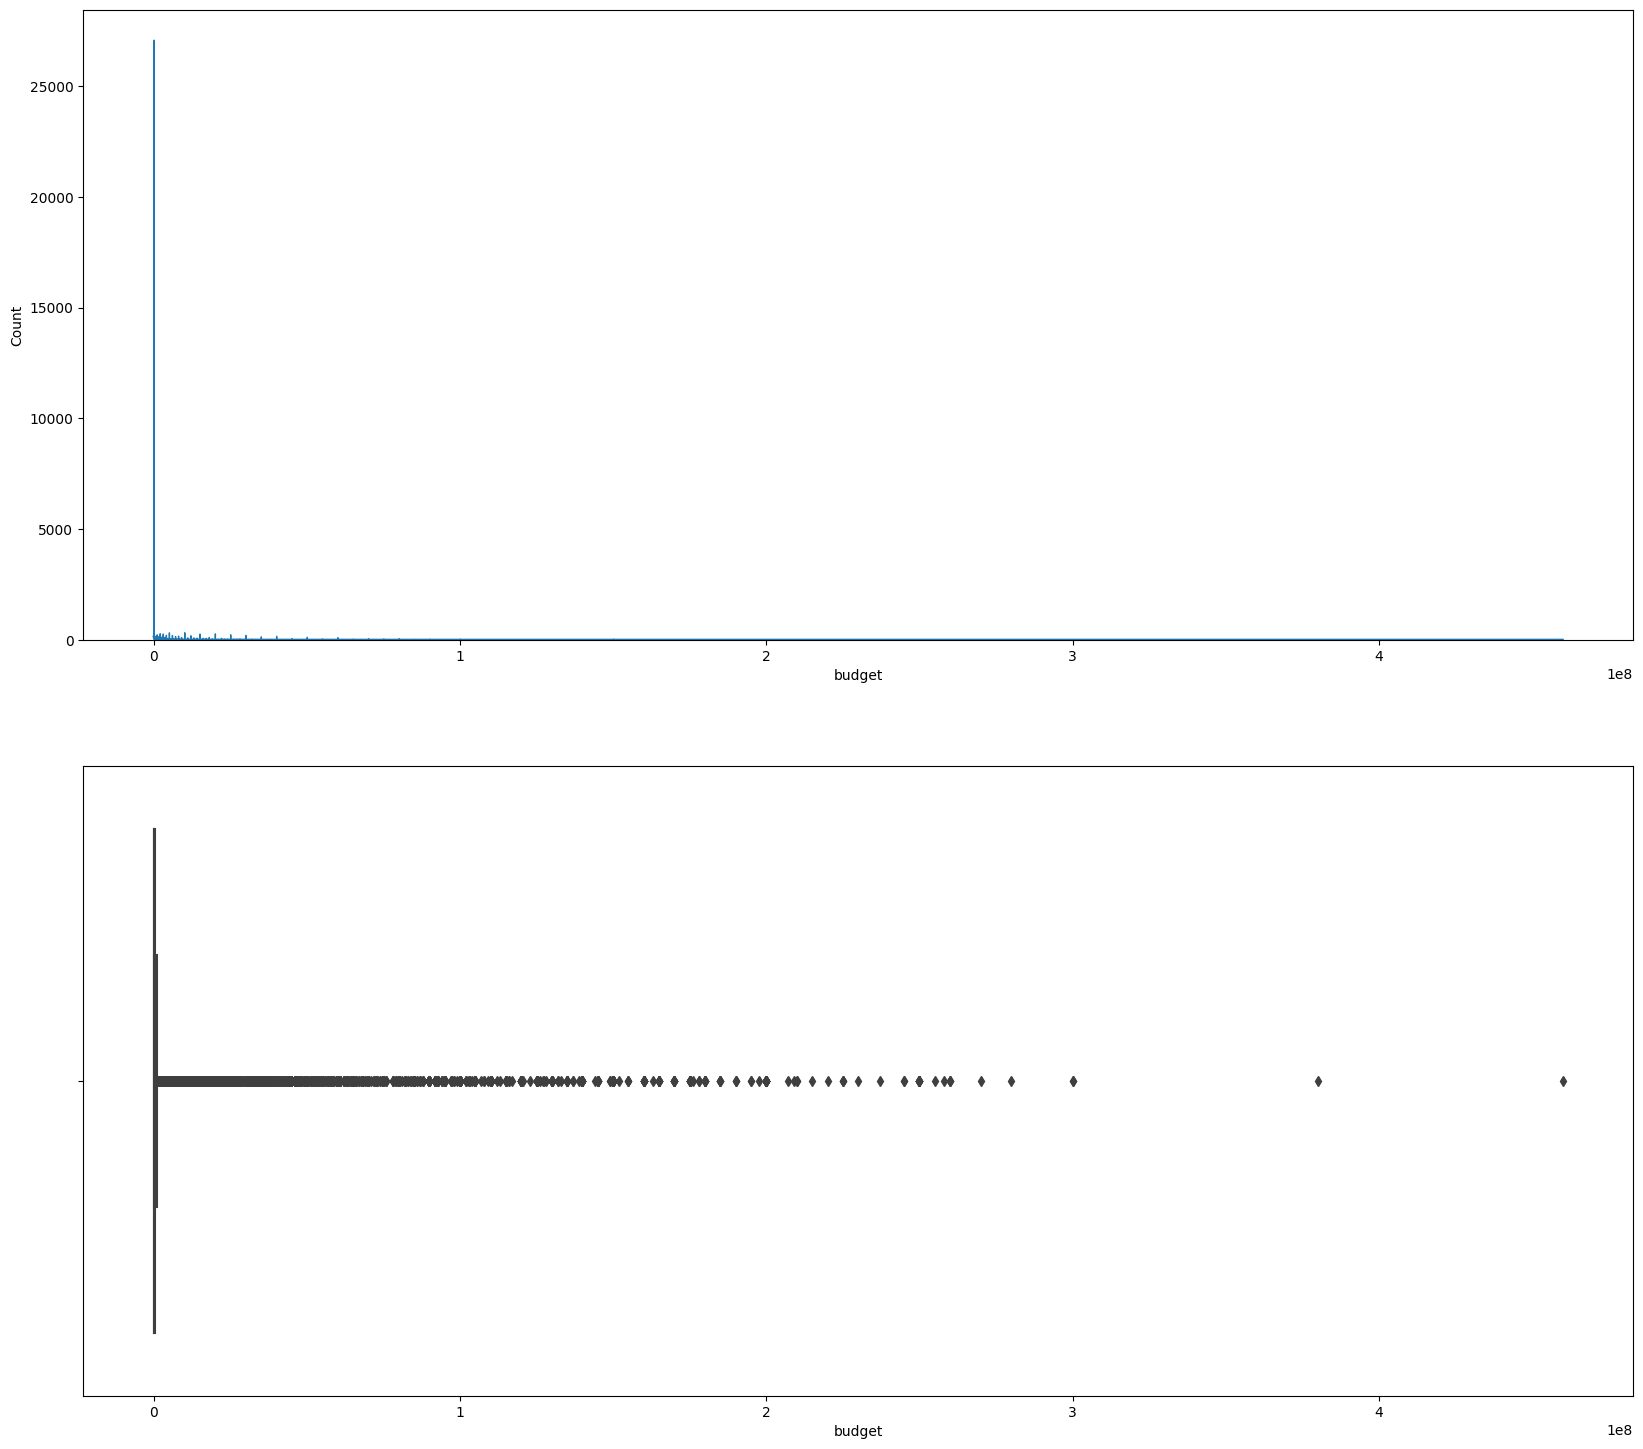

In [142]:
featureAnalysis("budget",movies_metadata)

In [143]:
movies_metadata[movies_metadata['budget'] == 0].shape[0] / movies_metadata.shape[0]

0.7185419798153317

In [144]:
#Still lots of missing values
movies_metadata.drop(['revenue'], inplace = True , axis=1)
movies_metadata.drop(['budget'], inplace = True , axis=1)

In [145]:
movies_metadata.columns.tolist()

['id',
 'imdb_id',
 'popularity',
 'release_date',
 'runtime',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'original_language_ar',
 'original_language_cn',
 'original_language_cs',
 'original_language_da',
 'original_language_de',
 'original_language_el',
 'original_language_en',
 'original_language_es',
 'original_language_fa',
 'original_language_fi',
 'original_language_fr',
 'original_language_he',
 'original_language_hi',
 'original_language_hu',
 'original_language_it',
 'original_language_ja',
 'original_language_ko',
 'original_language_nl',
 'original_lan

In [146]:
movies_metadata

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,video_False,video_True,video_Canceled,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
0,862,tt0114709,21.946943,1995-10-30,81.0,7.7,5415.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
1,8844,tt0113497,17.015539,1995-12-15,104.0,6.9,2413.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
2,15602,tt0113228,11.712900,1995-12-22,101.0,6.5,92.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
3,31357,tt0114885,3.859495,1995-12-22,127.0,6.1,34.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
4,11862,tt0113041,8.387519,1995-02-10,106.0,5.7,173.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,289923,tt0252966,0.386450,2000-10-03,30.0,7.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2000
45459,222848,tt0112613,0.661558,1995-01-01,85.0,3.5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
45460,30840,tt0102797,5.683753,1991-05-13,104.0,5.7,26.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1991
45462,111109,tt2028550,0.178241,2011-11-17,360.0,9.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2011


# 

#### Analyzing the features

In [147]:
status = ['video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored']

In [148]:
video_Canceled = movies_metadata[movies_metadata['video_Canceled']==1]
video_In_Production = movies_metadata[movies_metadata['video_In Production']==1]
video_Planned = movies_metadata[movies_metadata['video_Planned']==1]
video_Post_Production = movies_metadata[movies_metadata['video_Post Production']==1]
video_Released = movies_metadata[movies_metadata['video_Released']==1]
video_Rumored  = movies_metadata[movies_metadata['video_Rumored']==1]

In [149]:
video_Canceled

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,video_False,video_True,video_Canceled,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year


In [150]:
movies_metadata.drop(['video_Canceled'],inplace=True,axis =1)

In [151]:
video_In_Production

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,video_False,video_True,video_Canceled,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
16002,25073,tt1242618,9.715790,2009-01-01,89.0,5.2,31.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2009
19753,138122,tt2172071,3.550969,2012-10-19,145.0,6.2,49.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2012
23725,259233,tt3572132,1.235132,2014-06-28,91.0,6.0,20.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2014
26559,76600,tt1630029,6.020055,2020-12-16,0.0,0.0,58.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2020
32445,347035,tt1227183,1.935094,2016-08-19,96.0,6.9,24.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2016
33202,337730,tt4168502,1.593745,2015-06-10,98.0,5.9,35.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2015
33358,252983,tt3498786,1.531827,2017-12-31,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2017
35917,156981,tt1600429,1.023086,2015-03-21,84.0,4.3,10.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2015
36355,257450,tt3400060,1.352270,2015-08-06,79.0,5.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2015
39190,61123,tt1836210,0.676424,2011-04-20,95.0,5.3,11.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2011


In [152]:
video_Planned

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,video_False,video_True,video_Canceled,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
20108,130736,tt2208144,1.876830,2012-10-03,118.0,7.1,28.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2012
20989,118931,tt2332523,0.456974,2012-08-25,95.0,6.5,2.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2012
30402,38700,tt1502397,2.178546,2018-11-07,0.0,0.0,12.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2018
38107,366901,tt2474932,3.668802,2016-01-29,113.0,4.7,16.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2016
40619,339116,tt0825283,4.055025,2016-09-30,88.0,4.5,69.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2016
41178,413361,tt4431208,2.351255,2016-09-12,108.0,9.3,3.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2016
42282,394723,tt5271772,2.325847,2016-05-19,0.0,6.6,24.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2016
43245,348375,tt3011816,2.135199,2015-10-21,85.0,6.0,12.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2015
44422,430448,tt6398054,1.833216,2017-02-10,91.0,6.7,10.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2017
44967,352494,tt4876952,1.100185,2017-06-23,97.0,5.0,7.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2017


In [153]:
video_Post_Production

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,video_False,video_True,video_Canceled,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
2623,48259,tt0090886,2.524937,1986-12-12,105.0,6.0,17.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1986
17691,57211,tt1235790,0.689448,2011-08-05,107.0,6.6,9.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2011
18093,50875,tt1562568,1.137468,2011-08-26,109.0,5.3,14.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2011
18124,53328,tt1787816,0.078210,2011-06-03,95.0,9.0,2.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2011
20996,94841,tt1789724,0.273040,2012-05-20,96.0,3.9,7.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44907,412758,tt4401006,2.208627,2017-04-06,93.0,6.3,20.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2017
44909,436882,tt5490310,0.388826,2017-03-02,0.0,4.3,4.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2017
44929,433054,tt6333088,2.104922,2017-01-21,79.0,5.5,2.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2017
45077,355193,tt4610748,1.155504,2017-04-24,94.0,7.0,2.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2017


In [154]:
video_Released

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,video_False,video_True,video_Canceled,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
0,862,tt0114709,21.946943,1995-10-30,81.0,7.7,5415.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
1,8844,tt0113497,17.015539,1995-12-15,104.0,6.9,2413.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
2,15602,tt0113228,11.712900,1995-12-22,101.0,6.5,92.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
3,31357,tt0114885,3.859495,1995-12-22,127.0,6.1,34.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
4,11862,tt0113041,8.387519,1995-02-10,106.0,5.7,173.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,289923,tt0252966,0.386450,2000-10-03,30.0,7.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2000
45459,222848,tt0112613,0.661558,1995-01-01,85.0,3.5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
45460,30840,tt0102797,5.683753,1991-05-13,104.0,5.7,26.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1991
45462,111109,tt2028550,0.178241,2011-11-17,360.0,9.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2011


In [155]:
video_Released.shape[0] / movies_metadata.shape[0]

0.9931554648915611

We only want the movies that are already released, so we drop the others,since they are not a big number and are less than 1 percent.

In [156]:
movies_metadata = movies_metadata[movies_metadata['video_Released']==1]

In [157]:
movies_metadata

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,video_False,video_True,video_In Production,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
0,862,tt0114709,21.946943,1995-10-30,81.0,7.7,5415.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
1,8844,tt0113497,17.015539,1995-12-15,104.0,6.9,2413.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
2,15602,tt0113228,11.712900,1995-12-22,101.0,6.5,92.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
3,31357,tt0114885,3.859495,1995-12-22,127.0,6.1,34.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
4,11862,tt0113041,8.387519,1995-02-10,106.0,5.7,173.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,289923,tt0252966,0.386450,2000-10-03,30.0,7.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2000
45459,222848,tt0112613,0.661558,1995-01-01,85.0,3.5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
45460,30840,tt0102797,5.683753,1991-05-13,104.0,5.7,26.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1991
45462,111109,tt2028550,0.178241,2011-11-17,360.0,9.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2011


In [158]:
movies_metadata.drop(['video_In Production'], inplace = True , axis=1)
movies_metadata.drop(['video_Planned'], inplace = True , axis=1)
movies_metadata.drop(['video_Post Production'], inplace = True , axis=1)
movies_metadata.drop(['video_Released'], inplace = True , axis=1)
movies_metadata.drop(['video_Rumored'], inplace = True , axis=1)

In [159]:
movies_metadata

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,video_False,video_True,adult_False,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
0,862,tt0114709,21.946943,1995-10-30,81.0,7.7,5415.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
1,8844,tt0113497,17.015539,1995-12-15,104.0,6.9,2413.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
2,15602,tt0113228,11.712900,1995-12-22,101.0,6.5,92.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
3,31357,tt0114885,3.859495,1995-12-22,127.0,6.1,34.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
4,11862,tt0113041,8.387519,1995-02-10,106.0,5.7,173.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,289923,tt0252966,0.386450,2000-10-03,30.0,7.0,1.0,1,0,1,...,0,0,0,0,0,0,0,0,1,2000
45459,222848,tt0112613,0.661558,1995-01-01,85.0,3.5,1.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
45460,30840,tt0102797,5.683753,1991-05-13,104.0,5.7,26.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1991
45462,111109,tt2028550,0.178241,2011-11-17,360.0,9.0,3.0,1,0,1,...,0,0,0,0,0,0,0,0,1,2011


# 

#### Video False/Video True

In [160]:
movies_metadata['video_False'].shape[0] / movies_metadata.shape[0]

1.0

In [161]:
movies_metadata.drop(['video_True'], inplace = True , axis=1)
movies_metadata.drop(['video_False'], inplace = True , axis=1)

#### Runtime

,count,mean,std,min,25%,50%,75%,max
runtime,37001.0,97.243102,32.770353,0.0,87.0,96.0,108.0,931.0


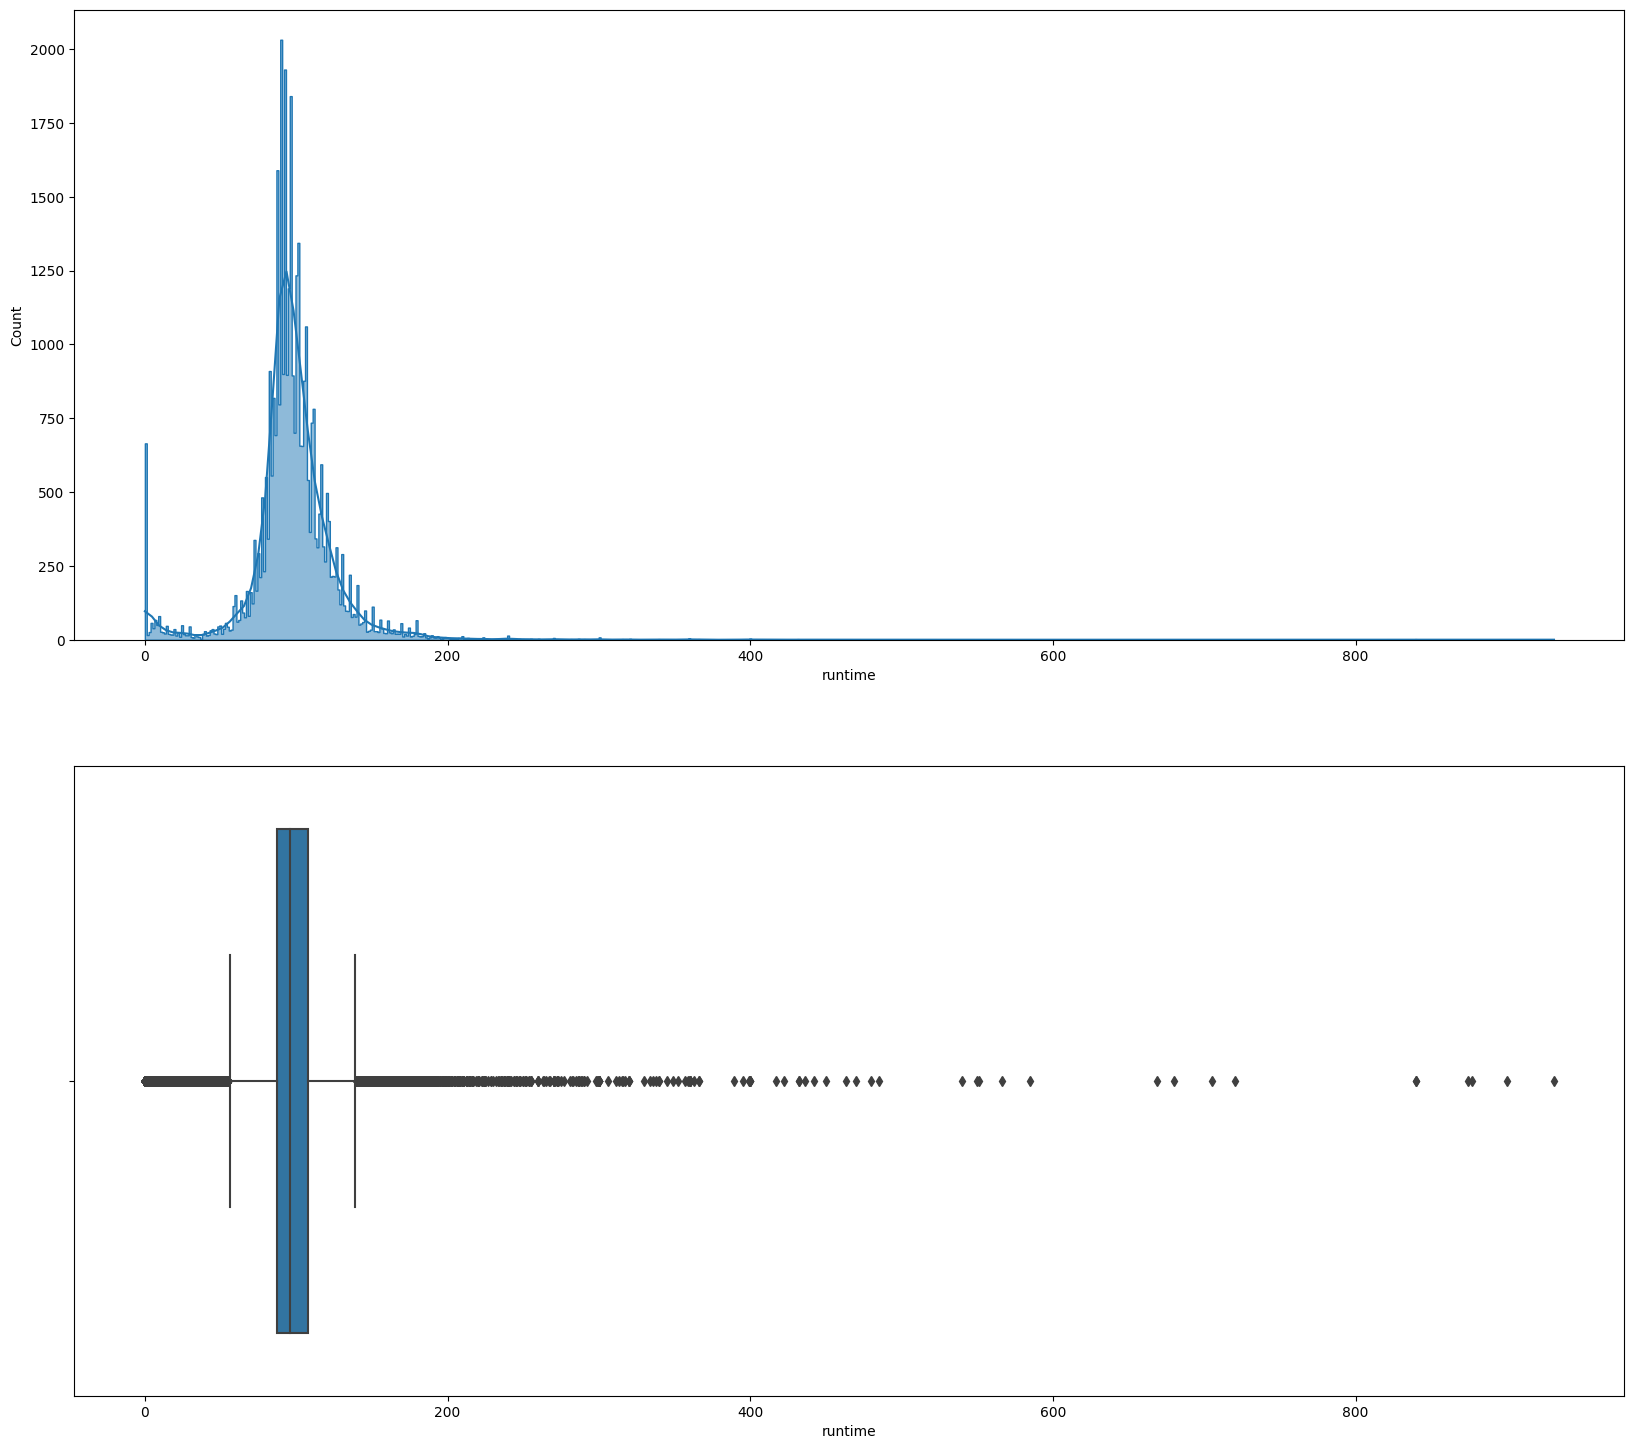

In [162]:
featureAnalysis("runtime",movies_metadata)

,count,mean,std,min,25%,50%,75%,max
vote_count,602.0,12.013289,26.656061,0.0,2.0,4.0,9.0,273.0


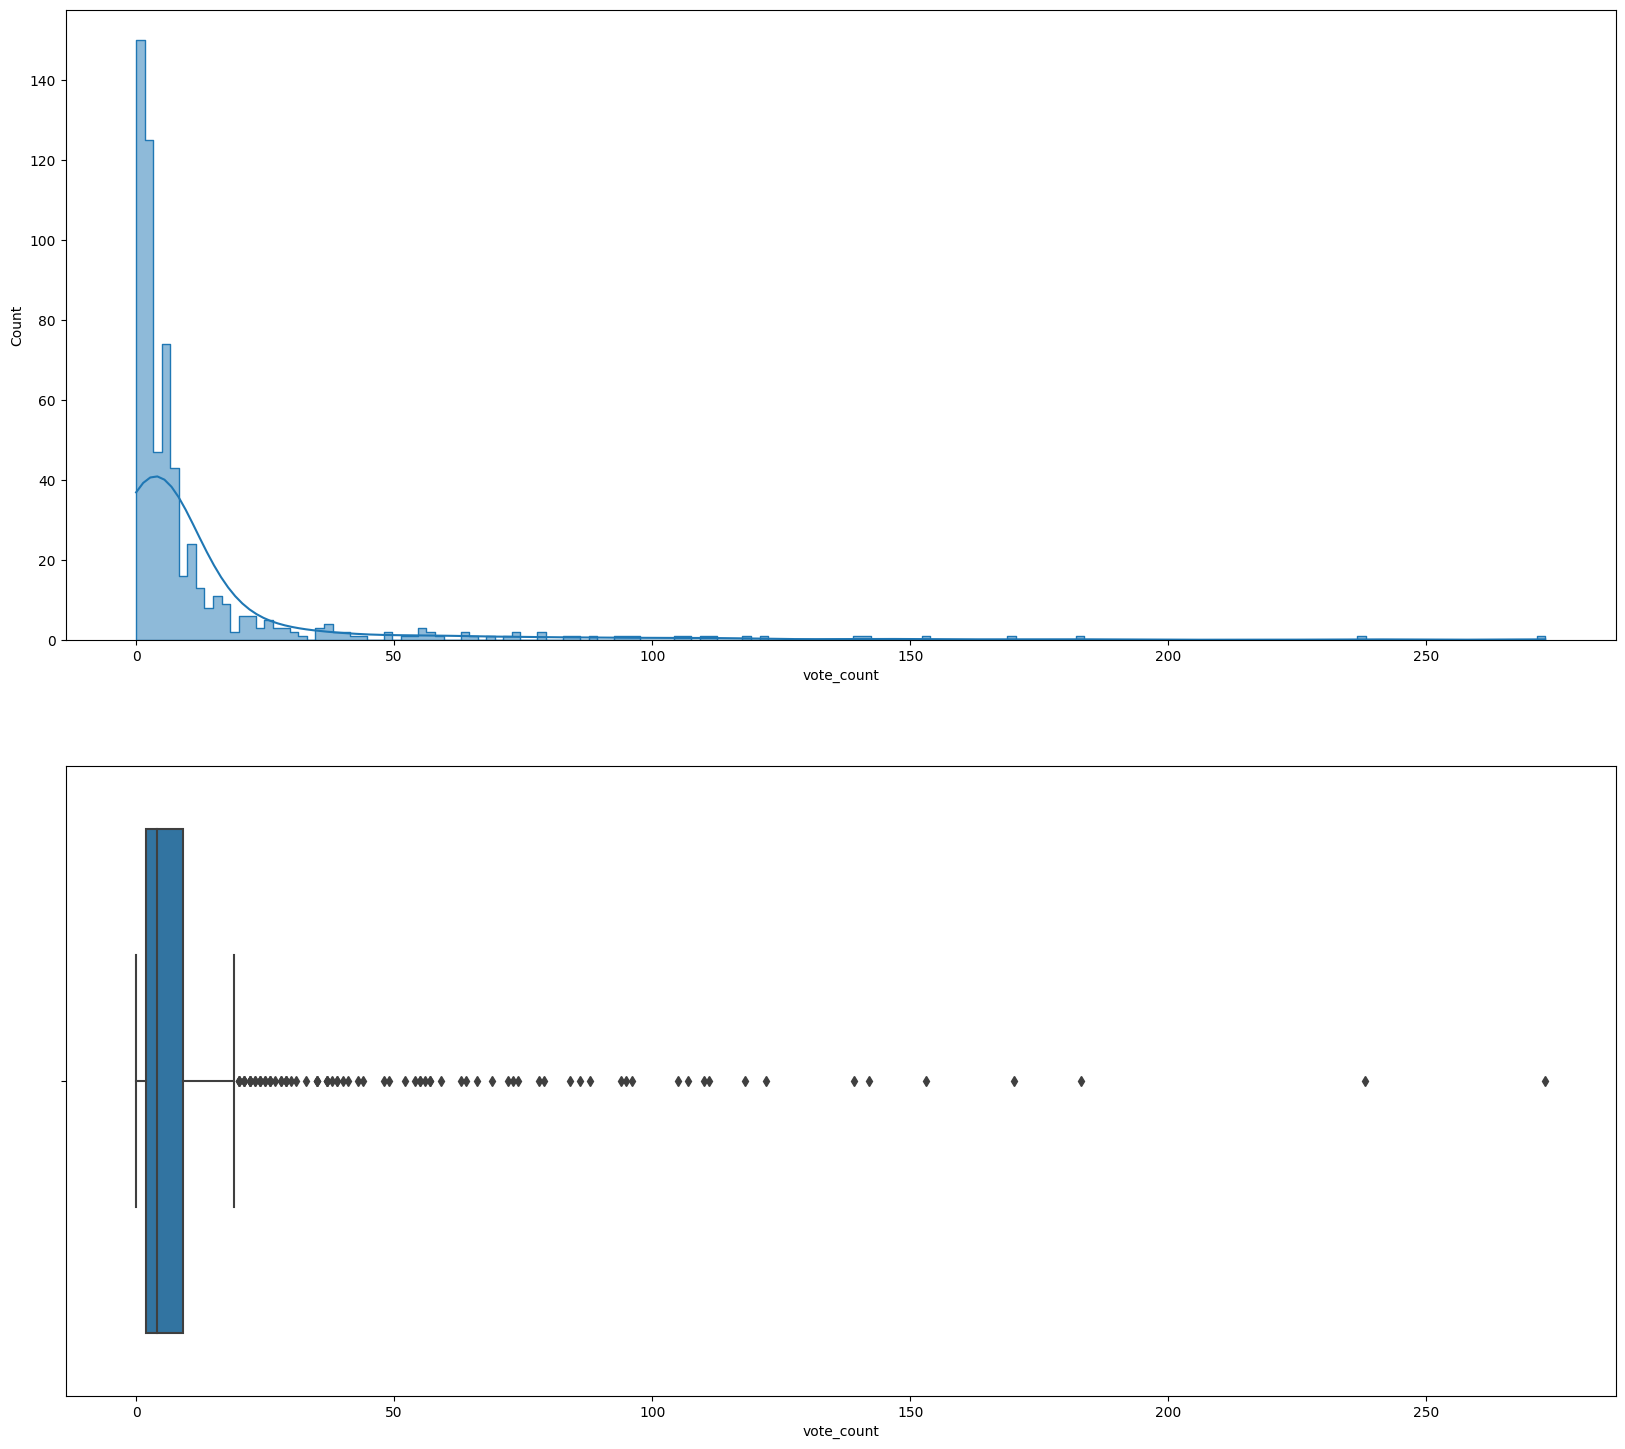

In [163]:
featureAnalysis("vote_count",movies_metadata[movies_metadata['runtime']==0]) 

In [164]:
movies_metadata = movies_metadata[movies_metadata['runtime']!=0]

In [165]:
movies_metadata

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
0,862,tt0114709,21.946943,1995-10-30,81.0,7.7,5415.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
1,8844,tt0113497,17.015539,1995-12-15,104.0,6.9,2413.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
2,15602,tt0113228,11.712900,1995-12-22,101.0,6.5,92.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
3,31357,tt0114885,3.859495,1995-12-22,127.0,6.1,34.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
4,11862,tt0113041,8.387519,1995-02-10,106.0,5.7,173.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,289923,tt0252966,0.386450,2000-10-03,30.0,7.0,1.0,1,0,1,...,0,0,0,0,0,0,0,0,1,2000
45459,222848,tt0112613,0.661558,1995-01-01,85.0,3.5,1.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1995
45460,30840,tt0102797,5.683753,1991-05-13,104.0,5.7,26.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1991
45462,111109,tt2028550,0.178241,2011-11-17,360.0,9.0,3.0,1,0,1,...,0,0,0,0,0,0,0,0,1,2011


,count,mean,std,min,25%,50%,75%,max
runtime,36399.0,98.851397,30.539663,1.0,88.0,96.0,108.0,931.0


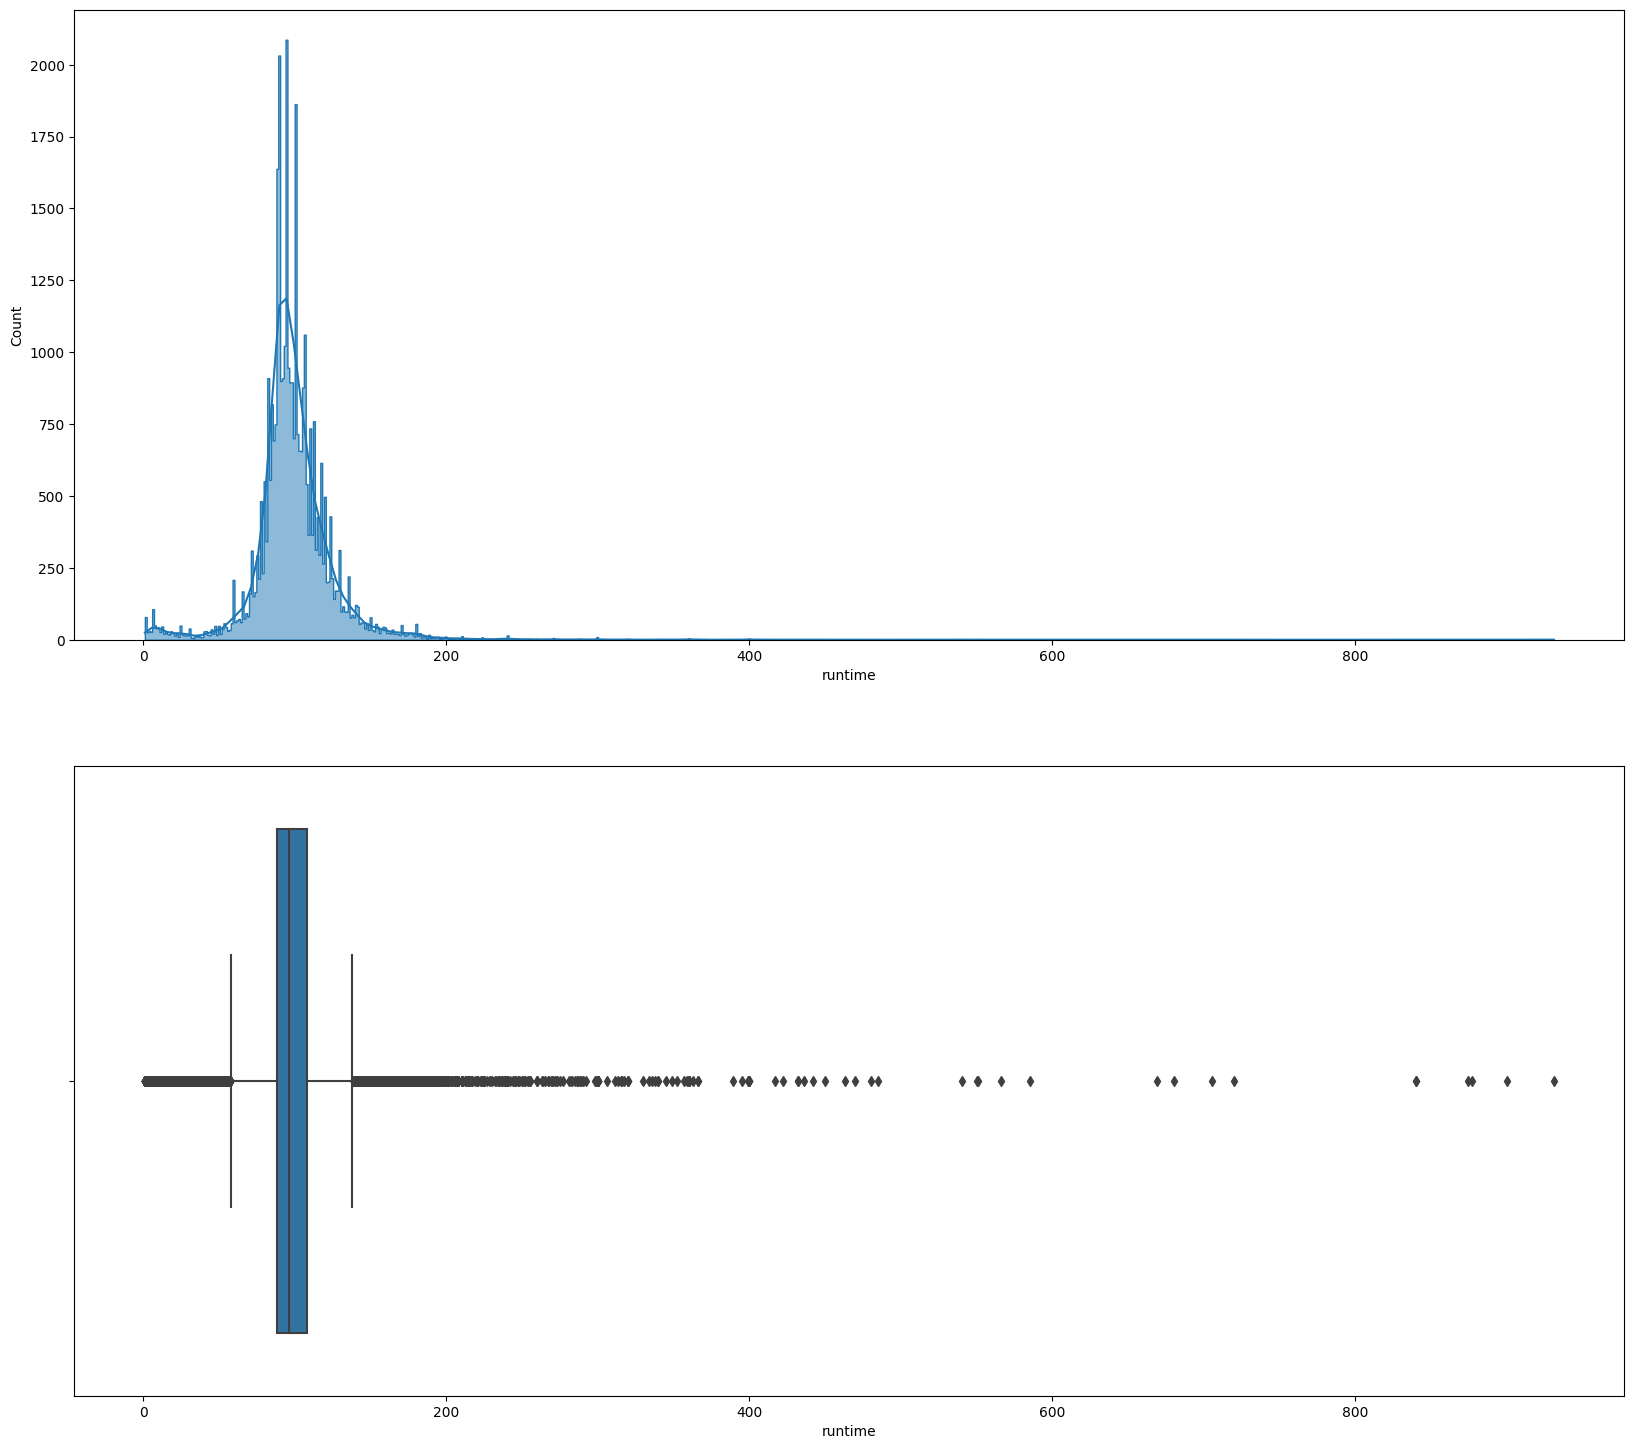

In [166]:
featureAnalysis("runtime",movies_metadata) 

In [167]:
movies_metadata[movies_metadata['runtime'] > 400]

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,...,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year
6747,42044,tt0090015,1.978031,1985-11-01,566.0,8.7,36.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1985
8635,29266,tt0063794,2.604571,1966-03-14,422.0,7.5,16.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1966
9117,30983,tt0120570,3.223150,1998-04-05,720.0,8.4,26.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1998
9206,110147,tt0207275,3.738876,2000-02-25,417.0,7.5,51.0,1,0,1,...,0,0,0,0,0,0,0,0,1,2000
10031,31414,tt0111341,7.515086,1994-02-08,450.0,8.1,56.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1994
13767,45560,tt0080196,2.255785,1980-08-28,931.0,8.4,5.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1980
14472,58435,tt0076147,0.248120,1977-07-07,442.0,7.6,5.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1977
18629,26397,tt0098769,3.431403,1990-09-23,680.0,9.2,15.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1990
19158,208988,tt0996994,0.487489,2007-09-23,874.0,5.3,3.0,1,0,1,...,0,0,0,0,0,0,0,0,1,2007
20888,108419,tt0196530,0.789978,1964-08-02,485.0,4.0,7.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1964


In [221]:
bins = [0, 15, 75, 135, 240, 600, float('inf')]
labels = [0, 1, 2, 3, 4, 5]
movies_metadata['Runtime Category'] = pd.cut(movies_metadata['runtime'], bins=bins, labels=labels, right=False)

# 

#### Vote

In [169]:
movies_metadata['vote_average'] = movies_metadata['vote_average'].astype(float)

In [170]:
movies_metadata['vote_count'] = movies_metadata['vote_count'].astype(float)

In [171]:
movies_metadata['Vote'] = movies_metadata['vote_average'] * movies_metadata['vote_count']

In [172]:
movies_metadata['Vote'] = movies_metadata['Vote'].astype(float)

In [173]:
movies_metadata['Vote'].dtypes

dtype('float64')

In [174]:
movies_metadata

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,...,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year,Runtime Category,Vote
0,862,tt0114709,21.946943,1995-10-30,81.0,7.7,5415.0,1,0,0,...,0,0,0,0,0,0,1,1995,normal,41695.5
1,8844,tt0113497,17.015539,1995-12-15,104.0,6.9,2413.0,1,0,1,...,0,0,0,0,0,0,1,1995,normal,16649.7
2,15602,tt0113228,11.712900,1995-12-22,101.0,6.5,92.0,1,0,0,...,0,0,0,0,0,0,1,1995,normal,598.0
3,31357,tt0114885,3.859495,1995-12-22,127.0,6.1,34.0,1,0,1,...,0,0,0,0,0,0,1,1995,normal,207.4
4,11862,tt0113041,8.387519,1995-02-10,106.0,5.7,173.0,1,0,0,...,0,0,0,0,0,0,1,1995,normal,986.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,289923,tt0252966,0.386450,2000-10-03,30.0,7.0,1.0,1,0,1,...,0,0,0,0,0,0,1,2000,short,7.0
45459,222848,tt0112613,0.661558,1995-01-01,85.0,3.5,1.0,1,0,1,...,0,0,0,0,0,0,1,1995,normal,3.5
45460,30840,tt0102797,5.683753,1991-05-13,104.0,5.7,26.0,1,0,1,...,0,0,0,0,0,0,1,1991,normal,148.2
45462,111109,tt2028550,0.178241,2011-11-17,360.0,9.0,3.0,1,0,1,...,0,0,0,0,0,0,1,2011,above 4h,27.0


In [175]:
len(movies_metadata['imdb_id'].tolist())

36399

In [176]:
#Drop Duplicated Values
movies_metadata=movies_metadata.drop_duplicates()
movies_metadata.shape

(36396, 309)

In [177]:
len(movies_metadata['imdb_id'].tolist())

36396

# 

### Text based features 

In [182]:
textBased

,id,imdb_id,title,original_title,overview,tagline
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...
...,...,...,...,...,...,...
45461,439050,tt6209470,Subdue,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman
45462,111109,tt2028550,Century of Birthing,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN
45463,67758,tt0303758,Betrayal,Betrayal,"When one of her hits goes wrong, a professiona...",A deadly game of wits.
45464,227506,tt0008536,Satan Triumphant,Satana likuyushchiy,"In a small town live two brothers, one a minis...",NaN


In [183]:
imdbID = movies_metadata['imdb_id'].tolist()

In [184]:
len(imdbID)

36396

In [185]:
textBased['imdb_id']

0        tt0114709
1        tt0113497
2        tt0113228
3        tt0114885
4        tt0113041
           ...    
45461    tt6209470
45462    tt2028550
45463    tt0303758
45464    tt0008536
45465    tt6980792
Name: imdb_id, Length: 45466, dtype: object

In [186]:
textBased = textBased[textBased['imdb_id'].isin(imdbID)]

In [187]:
textBased=textBased.drop_duplicates()
textBased.shape

(36383, 6)

In [194]:
movies_metadata = movies_metadata.drop_duplicates(subset='imdb_id')

In [195]:
textBased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36383 entries, 0 to 45463
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              36383 non-null  object
 1   imdb_id         36383 non-null  object
 2   title           36383 non-null  object
 3   original_title  36383 non-null  object
 4   overview        36178 non-null  object
 5   tagline         18447 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


In [196]:
textBased.drop(['tagline'], inplace = True , axis=1)

In [197]:
textBased

,id,imdb_id,title,original_title,overview
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...,...,...
45458,289923,tt0252966,The Burkittsville 7,The Burkittsville 7,A film archivist revisits the story of Rustin ...
45459,222848,tt0112613,Caged Heat 3000,Caged Heat 3000,It's the year 3000 AD. The world's most danger...
45460,30840,tt0102797,Robin Hood,Robin Hood,"Yet another version of the classic epic, with ..."
45462,111109,tt2028550,Century of Birthing,Siglo ng Pagluluwal,An artist struggles to finish his work while a...


In [222]:
movies_metadata.to_csv('encoded/movies_metadata_encoded.csv', index=False)

In [223]:
textBased.to_csv('encoded/textBased_encoded.csv', index=False)

### Add Continent to features

In [14]:
continents = {
    'North_America_West': ['United States of America', 'Canada'],
    'North_America_East': ['Mexico'],
    'Europe_West': ['United Kingdom', 'France', 'Germany', 'Italy', 'Spain', 'Belgium', 'Netherlands', 'Ireland',
                     'Luxembourg', 'Portugal'],
    'Europe_East': ['Russia', 'Sweden', 'Denmark', 'Finland', 'Poland', 'Switzerland', 'Czech Republic', 'Austria',
                    'Hungary', 'Romania', 'Croatia', 'Bulgaria', 'Estonia', 'Ukraine', 'Lithuania', 'Latvia',
                    'Slovenia', 'Albania', 'Monaco', 'Liechtenstein', 'Cyprus', 'Malta'],
    'Asia_West': ['Turkey', 'Israel', 'Lebanon', 'Georgia', 'Armenia', 'Syria', 'Azerbaijan'],
    'Asia_East': ['Japan', 'India', 'Hong Kong', 'China', 'South Korea', 'Taiwan', 'Thailand', 'Iran', 'Philippines',
                  'Singapore', 'Indonesia', 'Pakistan', 'Nepal', 'Uzbekistan', 'Kazakhstan', 'Kyrgyz Republic',
                  'Vietnam', 'Cambodia', 'Jordan', 'Iraq', 'Bangladesh', 'Laos', 'Mongolia', 'North Korea',
                  'Afghanistan', 'Sri Lanka'],
    'South_America_West': ['Brazil', 'Colombia', 'Venezuela', 'Ecuador', 'Peru'],
    'South_America_East': ['Argentina', 'Chile', 'Bolivia', 'Paraguay', 'Uruguay'],
    'Africa_West': ['Morocco', 'Algeria', 'Nigeria', 'Senegal', 'Ghana', 'Cameroon', 'Ivory Coast', 'Mali',
                    'Mauritania', 'Burkina Faso', 'Guinea', 'Guinea-Bissau'],
    'Africa_East': ['South Africa', 'Egypt', 'Tunisia', 'Ethiopia', 'Kenya', 'Angola', 'Uganda', 'Tanzania',
                    'Zimbabwe', 'Rwanda', 'Madagascar', 'Sudan', 'Mozambique'],
    'Oceania_West': ['Australia'],
    'Oceania_East': ['New Zealand']
}

In [2]:
temp_df = pd.read_csv("./encoded/movies_metadata3_encoded.csv")

In [19]:
continent_df = pd.DataFrame()

for continent, countries in continents.items():
    country_columns = [country for country in countries if country in temp_df.columns]
    continent_column = temp_df[country_columns].max(axis=1)
    continent_df[continent] = continent_column

movies_with_continents = pd.concat([temp_df, continent_df], axis=1)
movies_with_continents

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,...,Europe_West,Europe_East,Asia_West,Asia_East,South_America_West,South_America_East,Africa_West,Africa_East,Oceania_West,Oceania_East
0,862,tt0114709,21.946943,1995-10-30,81.0,7.7,5415.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8844,tt0113497,17.015539,1995-12-15,104.0,6.9,2413.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15602,tt0113228,11.712900,1995-12-22,101.0,6.5,92.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31357,tt0114885,3.859495,1995-12-22,127.0,6.1,34.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,11862,tt0113041,8.387519,1995-02-10,106.0,5.7,173.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35620,289923,tt0252966,0.386450,2000-10-03,30.0,7.0,1.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
35621,222848,tt0112613,0.661558,1995-01-01,85.0,3.5,1.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
35622,30840,tt0102797,5.683753,1991-05-13,104.0,5.7,26.0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
35623,111109,tt2028550,0.178241,2011-11-17,360.0,9.0,3.0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [35]:
movies_with_continents.iloc[:,181:248]

,Hong Kong,Sweden,Australia,South Korea,Belgium,Denmark,Netherlands,China,Finland,Mexico,...,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
movies_with_continents = movies_with_continents.drop(movies_with_continents.columns[180:248], axis=1)

In [43]:
movies_with_continents

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,...,Europe_West,Europe_East,Asia_West,Asia_East,South_America_West,South_America_East,Africa_West,Africa_East,Oceania_West,Oceania_East
0,862,tt0114709,21.946943,1995-10-30,81.0,7.7,5415.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8844,tt0113497,17.015539,1995-12-15,104.0,6.9,2413.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15602,tt0113228,11.712900,1995-12-22,101.0,6.5,92.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31357,tt0114885,3.859495,1995-12-22,127.0,6.1,34.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,11862,tt0113041,8.387519,1995-02-10,106.0,5.7,173.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35620,289923,tt0252966,0.386450,2000-10-03,30.0,7.0,1.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
35621,222848,tt0112613,0.661558,1995-01-01,85.0,3.5,1.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
35622,30840,tt0102797,5.683753,1991-05-13,104.0,5.7,26.0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
35623,111109,tt2028550,0.178241,2011-11-17,360.0,9.0,3.0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [44]:
movies_with_continents.to_csv('encoded/movies_with_continent_encoded.csv', index=False)